  # TELECOM CHURN <br>      `Madhavan Rangarajan`

### Import all necessary libraries for Data cleaning,manipulation and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing csv as pandas dataframe

In [2]:
churn = pd.read_csv('telecom_churn_data.csv')

### Looking at the head,shape and spread of the columns

In [3]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Lets check the % of missing in each column

In [6]:
init_miss = churn.isnull().mean().sort_values(ascending = False) * 100
init_miss = init_miss[init_miss > 0]

In [7]:
init_miss

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
                              ...    
last_date_of_month_8         1.100011
loc_ic_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_og_t2o_mou               1.018010
last_date_of_month_7         0.601006
Length: 166, dtype: float64

### As there are many columns which has lot of missing values lets visualize how the missing trend of the data looks like

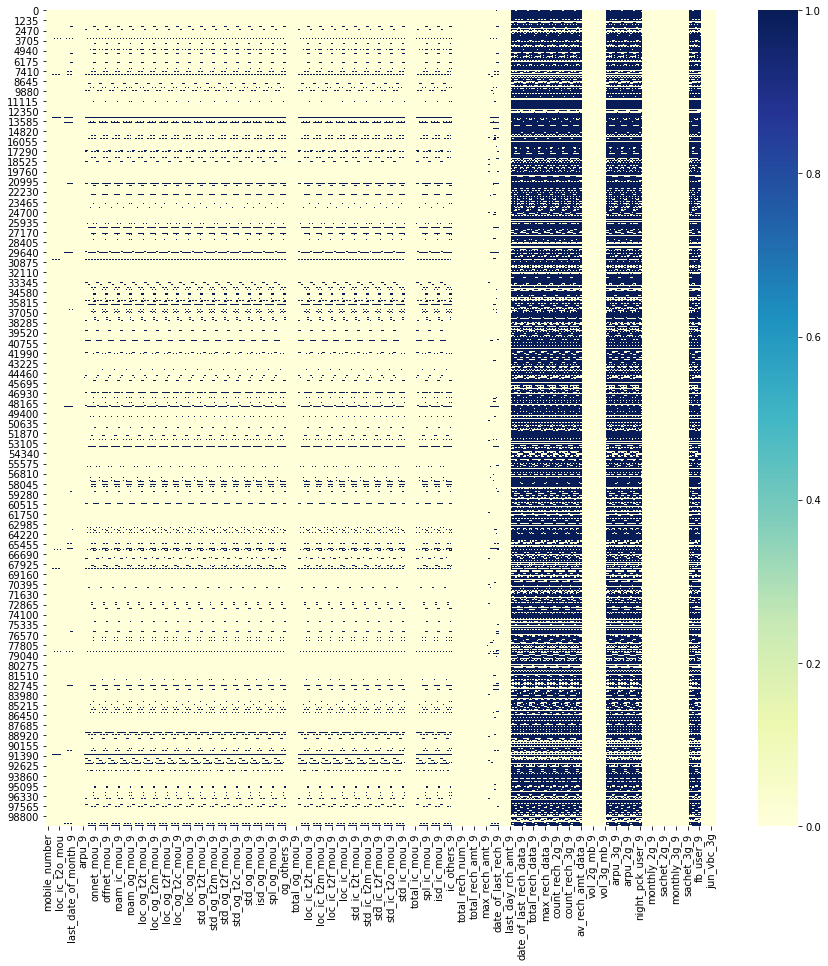

In [8]:
plt.figure(figsize = (15,15))
sns.heatmap(churn.isnull() , cmap="YlGnBu")

### Lets check at the columns which has above 50% missing values

In [9]:
above_50 = init_miss[init_miss > 50].sort_index()
above_50

arpu_2g_6                   74.846748
arpu_2g_7                   74.428744
arpu_2g_8                   73.660737
arpu_2g_9                   74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8                   73.660737
arpu_3g_9                   74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
fb_user_6                   74.846748
fb_user_7                   74.428744
fb_user_8   

In [10]:
churn[above_50.index].describe()

,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,...,max_rech_data_8,max_rech_data_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,...,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,86.398003,85.914450,86.599478,93.712026,89.555057,89.384120,91.173849,100.264116,192.600982,200.981292,...,125.717301,124.94144,0.025086,0.023034,0.020844,0.015971,2.463802,2.666419,2.651999,2.441170
std,172.767523,176.379871,168.247852,171.384224,193.124653,195.893924,188.180936,216.291992,192.646318,196.791224,...,109.437851,111.36376,0.156391,0.150014,0.142863,0.125366,2.789128,3.031593,3.074987,2.516339
min,-35.830000,-15.480000,-55.830000,-45.740000,-30.820000,-26.040000,-24.490000,-71.090000,1.000000,0.500000,...,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,...,25.000000,25.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,10.830000,8.810000,9.270000,14.800000,0.480000,0.420000,0.880000,2.605000,154.000000,154.000000,...,145.000000,145.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
75%,122.070000,122.070000,122.070000,140.010000,122.070000,119.560000,122.070000,140.010000,252.000000,252.000000,...,179.000000,179.00000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000
max,6433.760000,4809.360000,3483.170000,3467.170000,6362.280000,4980.900000,3716.900000,13884.310000,7546.000000,4365.000000,...,1555.000000,1555.00000,1.000000,1.000000,1.000000,1.000000,61.000000,54.000000,60.000000,84.000000


## From the above stats if we look carefully we have columns with negative minimum values such as 'average revenue per user 2g and 3g' where missing values may not indicate zero. But if we look at someother columns we see that the columns are in absolute scale but their minimum values are not zero. This indicates the null values present in those columns represent 'no activity' . Thus, lets see those columns and impute the missing values in those columns with zero

In [11]:
boool = (churn[above_50.index].describe().T['min'] > 0 )& (churn[above_50.index].describe().T['min'] <= 1)
can_be_zero = above_50[boool[boool == True].index].index
can_be_zero

Index(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'],
      dtype='object')

In [12]:
churn[can_be_zero] = churn[can_be_zero].replace(np.nan,0)

### Now lets check the missing values again

In [13]:
init_miss = churn.isnull().mean().sort_values(ascending = False) * 100
init_miss = init_miss[init_miss > 0]
above_50 = init_miss[init_miss > 50].sort_index()
above_50

arpu_2g_6                   74.846748
arpu_2g_7                   74.428744
arpu_2g_8                   73.660737
arpu_2g_9                   74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8                   73.660737
arpu_3g_9                   74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
fb_user_6                   74.846748
fb_user_7                   74.428744
fb_user_8                   73.660737
fb_user_9                   74.077741
night_pck_user_6            74.846748
night_pck_user_7            74.428744
night_pck_us

### Lets delete the high missing value columns(which we cannot impute with zero)

In [14]:
backup_col = churn[above_50.index]
churn = churn[churn.columns.difference(above_50.index)]

In [15]:
miss = churn.isnull().mean().sort_values(ascending = False) * 100
miss = miss[miss > 0].sort_index()
miss

date_of_last_rech_6    1.607016
date_of_last_rech_7    1.767018
date_of_last_rech_8    3.622036
date_of_last_rech_9    4.760048
ic_others_6            3.937039
                         ...   
std_og_t2o_mou         1.018010
std_og_t2t_mou_6       3.937039
std_og_t2t_mou_7       3.859039
std_og_t2t_mou_8       5.378054
std_og_t2t_mou_9       7.745077
Length: 126, dtype: float64

### Now the data has lower missing values( max upto 7% in each column) . Also,the data is kind of time series as we have features of different attributes for the months 6,7,8,9 . Let's check the attributes where missing values are present

In [16]:
uniq = set(miss.index.map(lambda x:x[:-1]))
uniq

{'date_of_last_rech_',
 'ic_others_',
 'isd_ic_mou_',
 'isd_og_mou_',
 'last_date_of_month_',
 'loc_ic_mou_',
 'loc_ic_t2f_mou_',
 'loc_ic_t2m_mou_',
 'loc_ic_t2o_mo',
 'loc_ic_t2t_mou_',
 'loc_og_mou_',
 'loc_og_t2c_mou_',
 'loc_og_t2f_mou_',
 'loc_og_t2m_mou_',
 'loc_og_t2o_mo',
 'loc_og_t2t_mou_',
 'offnet_mou_',
 'og_others_',
 'onnet_mou_',
 'roam_ic_mou_',
 'roam_og_mou_',
 'spl_ic_mou_',
 'spl_og_mou_',
 'std_ic_mou_',
 'std_ic_t2f_mou_',
 'std_ic_t2m_mou_',
 'std_ic_t2o_mou_',
 'std_ic_t2t_mou_',
 'std_og_mou_',
 'std_og_t2c_mou_',
 'std_og_t2f_mou_',
 'std_og_t2m_mou_',
 'std_og_t2o_mo',
 'std_og_t2t_mou_'}

In [17]:
len(uniq)

34

### One interesting observation we find below is,  for most of the users whose recharge amount is zero for a particular month then their minutes of usage is most probably 'null' for that month. This is beacuse people who have not recharged cannot continue to use their mobile services which includes outgoing,incoming,roaming,isd and std.

In [18]:
pd.concat([churn.filter(like = 'total_rech_amt') ,churn.filter(like = 'loc_og_mou')],axis = 1)

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9
0,362,252,252,0,NaN,NaN,0.00,NaN
1,74,384,283,121,35.39,150.51,299.54,72.11
2,168,315,116,358,60.66,67.41,67.66,64.81
3,230,310,601,410,183.03,118.68,37.99,83.03
4,196,350,287,200,117.96,241.33,208.16,98.61
...,...,...,...,...,...,...,...,...
99994,60,110,0,50,18.18,57.83,55.49,27.03
99995,110,110,182,30,121.99,75.48,79.41,99.49
99996,119,0,0,0,14.44,NaN,NaN,NaN
99997,381,358,716,862,0.00,0.00,0.00,0.00


In [19]:
import copy
churn_kk = copy.deepcopy(churn)

## Step 1) Lets set filt as indices of all the rows whose recharge amount + data recharge amount is zero for a particular month <br> Step 2)  Lets check if a column belonging to that month also has 'nan' at indices where filt is zero and if it is so replace those entries with zero as we know that usage for those months is meant to be zero

In [20]:
date_col = churn_kk.filter(like = 'date').columns

In [21]:
for x in range(6,10):
    filt = churn_kk[churn_kk['total_rech_amt_' + str(x)] + churn_kk['total_rech_data_' + str(x)] == 0].index
    for y in churn_kk.filter(like = '_'+ str(x)).columns.difference(date_col):
        temp1 = churn_kk[y][filt].isna()
        temp1 = temp1[temp1 == True]
        churn_kk[y][temp1.index] = 0
        


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Lets check the missing values of all the columns after we replace such entries with zero

In [22]:
miss_after_zero = churn_kk.isnull().mean().sort_values(ascending = False) * 100
miss_after_zero = miss_after_zero[miss_after_zero > 0].sort_index()
miss_after_zero.sort_values(ascending = False)

date_of_last_rech_9     4.760048
date_of_last_rech_8     3.622036
date_of_last_rech_7     1.767018
last_date_of_month_9    1.659017
date_of_last_rech_6     1.607016
                          ...   
std_ic_t2m_mou_9        0.599006
loc_ic_t2m_mou_9        0.599006
std_ic_t2o_mou_9        0.599006
loc_ic_t2f_mou_9        0.599006
std_og_t2t_mou_9        0.599006
Length: 126, dtype: float64

### Lets analyize the data columns and see if we can do something with it

In [23]:
churn_kk[date_col] = pd.to_datetime(churn_kk[date_col].stack(), errors = 'coerce').unstack()
churn_kk[date_col]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9
0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-30,2014-07-31,2014-08-31,2014-09-30
1,2014-06-29,2014-07-31,2014-08-28,2014-09-30,2014-06-30,2014-07-31,2014-08-31,2014-09-30
2,2014-06-17,2014-07-24,2014-08-14,2014-09-29,2014-06-30,2014-07-31,2014-08-31,2014-09-30
3,2014-06-28,2014-07-31,2014-08-31,2014-09-30,2014-06-30,2014-07-31,2014-08-31,2014-09-30
4,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-30,2014-07-31,2014-08-31,2014-09-30
...,...,...,...,...,...,...,...,...
99994,2014-06-03,2014-07-20,2014-08-26,2014-09-25,2014-06-30,2014-07-31,2014-08-31,2014-09-30
99995,2014-06-17,2014-07-17,2014-08-24,2014-09-26,2014-06-30,2014-07-31,2014-08-31,2014-09-30
99996,2014-06-13,2014-07-26,NaT,2014-09-02,2014-06-30,2014-07-31,2014-08-31,2014-09-30
99997,2014-06-17,2014-07-19,2014-08-20,2014-09-17,2014-06-30,2014-07-31,2014-08-31,2014-09-30


## Lets make a derived column ,which tells us how many days before the last day of the month the customer has made his last recharge. This may be important feature for us in the modelling stages.

In [24]:
for y in range(6,10):
    differ = churn_kk[date_col].filter(like = str(y))
    churn_kk['days_last_rech_month_'+ str(y)] = differ.iloc[:,1] - differ.iloc[:,0]
    churn_kk['days_last_rech_month_'+ str(y)] = pd.to_numeric(churn_kk['days_last_rech_month_'+ str(y)].map(lambda x:str(x).split()[0]), errors = 'coerce')

### Lets drop the date columns now as we are using our derived features

In [25]:
churn_kk = churn_kk.drop(date_col,axis = 1)

## `We need to predict churn only for the high-value customers. High-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount (calling + data) in the first two months (the good phase).`

In [26]:
high_value = churn_kk[churn_kk[['total_rech_amt_6','total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis = 1) > churn_kk[['total_rech_amt_6','total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis = 1).quantile(0.7)]
high_value

,aon,arpu_6,arpu_7,arpu_8,arpu_9,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,...,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,days_last_rech_month_6,days_last_rech_month_7,days_last_rech_month_8,days_last_rech_month_9
0,968,197.385,214.816,213.803,21.100,30.40,252.0,252.0,252.0,0.0,...,5.75,0.00,83.57,150.76,109.61,0.00,9.0,15.0,23.0,2.0
7,802,1069.180,1349.850,3171.480,500.000,57.74,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,3.0,6.0,5.0,0.0
8,315,378.721,492.223,137.362,166.787,21.03,0.0,177.0,69.0,0.0,...,0.03,0.00,0.00,750.95,11.94,0.00,5.0,0.0,1.0,0.0
16,511,430.975,299.869,187.894,206.490,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.0,20.0
21,720,514.453,597.753,637.760,578.596,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,820,328.594,202.966,118.707,324.143,0.00,154.0,121.0,117.0,554.0,...,202.22,723.41,0.00,0.00,0.00,232.56,9.0,0.0,4.0,2.0
99986,2696,644.973,455.228,564.334,267.451,497.45,17.0,14.0,25.0,25.0,...,6.47,9.14,736.01,1129.34,926.78,941.48,10.0,3.0,13.0,11.0
99988,328,312.558,512.932,402.080,533.502,104.73,0.0,154.0,154.0,154.0,...,0.79,0.05,0.00,13.56,678.74,393.34,0.0,3.0,2.0,1.0
99997,478,322.991,303.386,606.817,731.010,1445.74,583.0,358.0,716.0,862.0,...,136.47,85.67,1453.63,1382.08,2683.30,4177.14,13.0,12.0,11.0,13.0


### We have about 29950 datapoints

In [27]:
len(high_value)

29949

In [28]:
high_value

,aon,arpu_6,arpu_7,arpu_8,arpu_9,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,...,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,days_last_rech_month_6,days_last_rech_month_7,days_last_rech_month_8,days_last_rech_month_9
0,968,197.385,214.816,213.803,21.100,30.40,252.0,252.0,252.0,0.0,...,5.75,0.00,83.57,150.76,109.61,0.00,9.0,15.0,23.0,2.0
7,802,1069.180,1349.850,3171.480,500.000,57.74,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,3.0,6.0,5.0,0.0
8,315,378.721,492.223,137.362,166.787,21.03,0.0,177.0,69.0,0.0,...,0.03,0.00,0.00,750.95,11.94,0.00,5.0,0.0,1.0,0.0
16,511,430.975,299.869,187.894,206.490,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.0,20.0
21,720,514.453,597.753,637.760,578.596,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,820,328.594,202.966,118.707,324.143,0.00,154.0,121.0,117.0,554.0,...,202.22,723.41,0.00,0.00,0.00,232.56,9.0,0.0,4.0,2.0
99986,2696,644.973,455.228,564.334,267.451,497.45,17.0,14.0,25.0,25.0,...,6.47,9.14,736.01,1129.34,926.78,941.48,10.0,3.0,13.0,11.0
99988,328,312.558,512.932,402.080,533.502,104.73,0.0,154.0,154.0,154.0,...,0.79,0.05,0.00,13.56,678.74,393.34,0.0,3.0,2.0,1.0
99997,478,322.991,303.386,606.817,731.010,1445.74,583.0,358.0,716.0,862.0,...,136.47,85.67,1453.63,1382.08,2683.30,4177.14,13.0,12.0,11.0,13.0


### Now we need to tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are: <br>  a) total_ic_mou_9 <br> b)  total_og_mou_9 <br>    c) vol_2g_mb_9 <br>  d) vol_3g_mb_9

### So to get 'total_ic_mou_9' + 'total_og_mou_9'  lets filter all the columns containing 'minutes of usage' and use them to sum up . Similarly lets do for data usage , sum all of them up and create a series to filter on called 'usage_based'

In [29]:
usage_based = high_value.filter(like = 'total').filter(like = '_9').filter(like = 'mou').sum(axis = 1) + high_value.filter(like = 'vol').filter(like = '9').sum(axis = 1) 
usage_based

0           0.00
7           0.00
8         177.09
16        590.30
21       1284.14
          ...   
99984    1119.67
99986    2592.97
99988     841.39
99997    4265.02
99998       0.00
Length: 29949, dtype: float64

### All the customers who have not made any usage are tagged as 1(churners) and others are tagged as zero

In [30]:
high_value['churn'] = usage_based.map(lambda x:1 if x == 0 else 0)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### As we must not use the data of churned phase for modelling purposes lets remove all those columns of 9th month

In [31]:
high_value = high_value.loc[:,~high_value.columns.str.contains('_9')]

### Lets see the missing values and its pattern in the 'high_value' customer data 

In [32]:
miss = high_value.isnull().mean().sort_values(ascending = False) * 100
miss = miss[miss > 0].sort_index()
miss.sort_values(ascending = False)

days_last_rech_month_8    1.933287
spl_og_mou_6              1.138602
og_others_6               1.138602
std_ic_t2o_mou_6          1.138602
isd_og_mou_6              1.138602
                            ...   
loc_og_t2o_mou            0.744599
loc_ic_t2o_mou            0.744599
std_og_t2o_mou            0.744599
days_last_rech_month_7    0.323884
days_last_rech_month_6    0.203680
Length: 93, dtype: float64

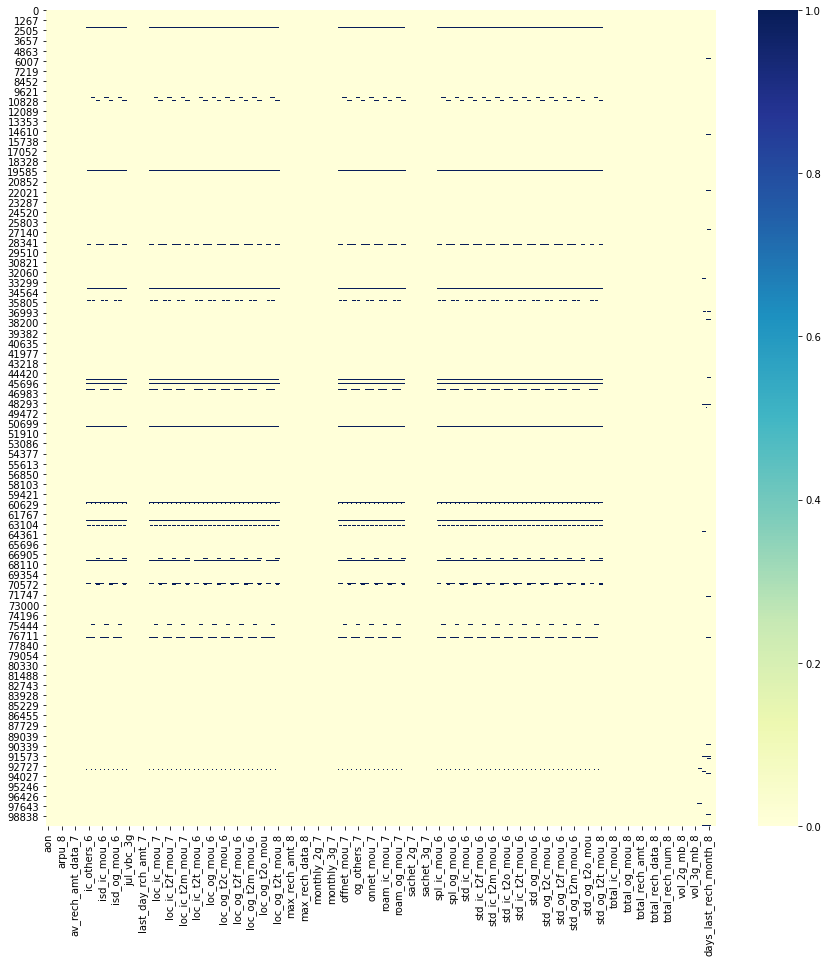

In [33]:
plt.figure(figsize = (15,15))
sns.heatmap(high_value.isnull() , cmap="YlGnBu")

### As we only have little missing values in some columns let use the KNN imputation technique for imputation

In [34]:
import copy
from sklearn.impute import KNNImputer
high_impute = copy.deepcopy(high_value)

In [35]:
impute = KNNImputer()
high_impute[high_impute.columns] = impute.fit_transform(high_impute)

In [36]:
high_impute

,aon,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,circle_id,ic_others_6,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,days_last_rech_month_6,days_last_rech_month_7,days_last_rech_month_8,churn
0,968.0,197.385,214.816,213.803,30.40,252.0,252.0,252.0,109.0,1.316,...,30.13,1.32,5.75,83.57,150.76,109.61,9.0,15.0,23.0,1.0
7,802.0,1069.180,1349.850,3171.480,57.74,0.0,0.0,0.0,109.0,15.740,...,0.00,0.00,0.00,0.00,0.00,0.00,3.0,6.0,5.0,1.0
8,315.0,378.721,492.223,137.362,21.03,0.0,177.0,69.0,109.0,0.000,...,0.00,356.00,0.03,0.00,750.95,11.94,5.0,0.0,1.0,0.0
16,511.0,430.975,299.869,187.894,0.00,0.0,0.0,0.0,109.0,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.0,0.0
21,720.0,514.453,597.753,637.760,0.00,0.0,0.0,0.0,109.0,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,820.0,328.594,202.966,118.707,0.00,154.0,121.0,117.0,109.0,0.000,...,1248.50,725.05,202.22,0.00,0.00,0.00,9.0,0.0,4.0,0.0
99986,2696.0,644.973,455.228,564.334,497.45,17.0,14.0,25.0,109.0,0.000,...,34.28,16.41,6.47,736.01,1129.34,926.78,10.0,3.0,13.0,0.0
99988,328.0,312.558,512.932,402.080,104.73,0.0,154.0,154.0,109.0,0.200,...,0.00,0.00,0.79,0.00,13.56,678.74,0.0,3.0,2.0,0.0
99997,478.0,322.991,303.386,606.817,1445.74,583.0,358.0,716.0,109.0,0.000,...,76.51,241.77,136.47,1453.63,1382.08,2683.30,13.0,12.0,11.0,0.0


In [37]:
high_impute.isnull().sum().sum()

0

### `Now we have a dataframe with no missing values. Lets check if there any other nuances in the data`

In [38]:
one_unique = high_impute.nunique()[high_impute.nunique() == 1]
one_unique

circle_id           1
loc_ic_t2o_mou      1
loc_og_t2o_mou      1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_og_t2o_mou      1
dtype: int64

### Lets drop all those columns which has only one unique value

In [39]:
high_impute = high_impute.drop(one_unique.index,axis = 1)

### Lets remove the mobile numbers of the customers as it is unncessary for modelling

In [40]:
mob_num = high_impute.pop('mobile_number')

In [41]:
high_impute.head()

,aon,arpu_6,arpu_7,arpu_8,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,ic_others_6,ic_others_7,...,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,days_last_rech_month_6,days_last_rech_month_7,days_last_rech_month_8,churn
0,968.0,197.385,214.816,213.803,30.40,252.0,252.0,252.0,1.316,0.082,...,30.13,1.32,5.75,83.57,150.76,109.61,9.0,15.0,23.0,1.0
7,802.0,1069.180,1349.850,3171.480,57.74,0.0,0.0,0.0,15.740,15.190,...,0.00,0.00,0.00,0.00,0.00,0.00,3.0,6.0,5.0,1.0
8,315.0,378.721,492.223,137.362,21.03,0.0,177.0,69.0,0.000,0.000,...,0.00,356.00,0.03,0.00,750.95,11.94,5.0,0.0,1.0,0.0
16,511.0,430.975,299.869,187.894,0.00,0.0,0.0,0.0,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.0,0.0
21,720.0,514.453,597.753,637.760,0.00,0.0,0.0,0.0,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0


### As 9th month is the phase where customer has churned it may be that he would have shown different behaviour in the 8th month(action phase) compared to 6th and 7th month. So lets create dummy variables for all time related attributes such that if the 8th month value is lower than that of the mean of the 6th and 7th month lets mark them as 1(possible churn) or else 0(possibly not churn)

In [42]:
uniq = set(high_impute.columns.map(lambda x:x[:-1]))   #unique columns

In [43]:
time_se = pd.DataFrame() #saving the output in seperate dataframe
for x in uniq: #looping on all columns with same prefixes
    if len(high_impute.filter(like = x).columns) > 1:
        temp = high_impute[sorted(high_impute.filter(like = x).columns)[:-1]].mean(axis = 1) - high_impute.filter(like = x + '8').mean(axis = 1)
        temp = temp.map(lambda x:1 if x >= 0 else 0)
        time_se['8th_month_decrease_' + x[:-1] ] = temp
        
time_se.head(8)

,8th_month_decrease_sachet_2g,8th_month_decrease_max_rech_amt,8th_month_decrease_loc_og_t2m_mou,8th_month_decrease_std_og_t2t_mou,8th_month_decrease_arpu,8th_month_decrease_isd_og_mou,8th_month_decrease_monthly_3g,8th_month_decrease_roam_og_mou,8th_month_decrease_vol_3g_mb,8th_month_decrease_isd_ic_mou,...,8th_month_decrease_std_ic_t2t_mou,8th_month_decrease_total_rech_data,8th_month_decrease_std_og_t2f_mou,8th_month_decrease_loc_ic_t2f_mou,8th_month_decrease_loc_og_t2f_mou,8th_month_decrease_loc_og_t2t_mou,8th_month_decrease_spl_og_mou,8th_month_decrease_std_ic_t2m_mou,8th_month_decrease_loc_og_mou,8th_month_decrease_vol_2g_mb
0,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,0,1,1,0,0,1,0,1,0,...,0,1,0,1,1,1,0,0,1,1
8,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,1
16,1,0,1,1,1,1,1,1,1,0,...,1,1,1,0,0,0,0,0,1,1
21,1,1,0,1,0,1,1,1,1,1,...,1,1,1,0,0,0,1,0,0,1
33,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
38,1,0,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
41,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# `We know that tree based algorithms are robust to outliers in the data and doesnot have any assumptions about the distribution. But algorithms like Logistic regression , Svm are effected by outliers. So, lets apply necessary outlier treatment a different dataframe and  simultaneously do some visualizations`

In [44]:
out_treat = copy.deepcopy(high_impute)

### Lets plot the first few features to check how the distribution across 'churners' and 'non churners look like.

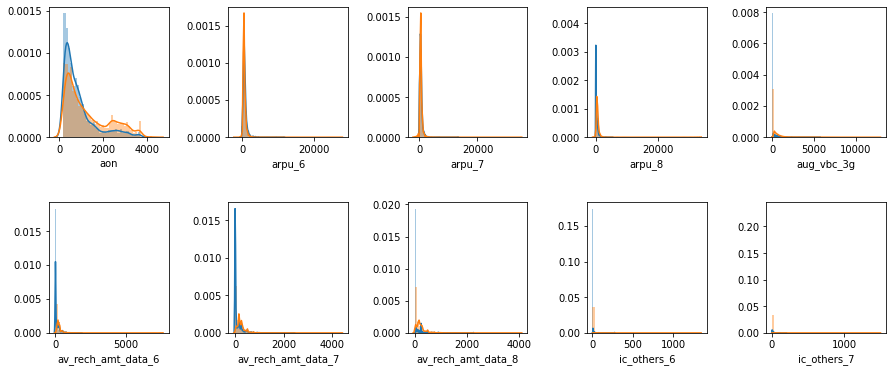

In [45]:
c = 1

plt.figure(figsize= (15,6))
for x in out_treat.columns[:10]:
    plt.subplot(2,5,c)
    sns.distplot( out_treat[out_treat['churn'] == 1][x] , label= True)
    sns.distplot( out_treat[out_treat['churn'] == 0][x] , label = True)
    c += 1
plt.subplots_adjust(wspace= 0.5 , hspace= 0.5 )
    
    

### We can see that the data is not interpretable because we have a lot of outliers in the top tail for most of the columns. Even transformation of variables in log scale will not solve the problem if the data is skewed to such extent

### `Lets define a function to check the percentage of data we lose if we remove outliers using inter quartile range method`

In [46]:
def percent_out(x):
    
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    
    len_filter = len(x[x.between(lower_bound, upper_bound, inclusive=True)])
    percent_gone = 100 - ( (100 *len_filter) /len(x))
    return(round(percent_gone,2))
    

In [47]:
removal = pd.DataFrame(columns= ['column_name','%_data_loss'] )
k = 0
for y in out_treat.columns.difference(['churn']):
    removal.loc[k] = [y,percent_out(out_treat[y])]
    k += 1
removal.set_index('column_name',inplace = True)
removal = removal.sort_values('%_data_loss')

In [48]:
col_to_rem_outlier = removal[removal['%_data_loss'] < 5].index
removal[removal['%_data_loss'] < 5]

,%_data_loss
column_name,
aon,0.09
og_others_7,0.52
og_others_8,0.61
max_rech_data_8,1.64
max_rech_data_6,1.68
max_rech_data_7,1.69
last_day_rch_amt_8,3.78
last_day_rch_amt_7,4.46
total_rech_amt_8,4.48


## We only loose little data if we remove the outliers in the above columns. So,lets do it

In [49]:

for x in col_to_rem_outlier:
    
    q1 = high_impute[x].quantile(0.25)
    q3 = high_impute[x].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    
    out_treat = out_treat[out_treat[x].between(lower_bound, upper_bound, inclusive=True)]
    
    

In [50]:
len(out_treat) * 100/len(high_impute)

76.55347423954055

### We have lost about 25% of the data. We cannot afford to loose much from here. Lets see other features with outliers and see what we can do about it

In [51]:
removal = removal[removal['%_data_loss'] >= 5]
removal.index

Index(['arpu_6', 'total_rech_data_6', 'total_og_mou_8', 'total_rech_amt_7',
       'arpu_7', 'total_rech_num_6', 'total_rech_num_7', 'av_rech_amt_data_7',
       'total_rech_num_8', 'av_rech_amt_data_8',
       ...
       'spl_ic_mou_6', 'roam_og_mou_6', 'og_others_6', 'loc_og_t2c_mou_7',
       'sachet_2g_8', 'isd_ic_mou_6', 'ic_others_7', 'loc_og_t2c_mou_8',
       'isd_ic_mou_7', 'loc_og_t2c_mou_6'],
      dtype='object', name='column_name', length=122)

In [52]:
removal_1 = pd.DataFrame(columns= ['column_name','%_loss'] )
k = 0
for y in removal.index:
    removal_1.loc[k] = [y,percent_out(out_treat[y])]
    k += 1
removal_1.set_index('column_name',inplace = True)
removal_1 = removal_1.sort_values('%_loss')
removal_1

,%_loss
column_name,
arpu_6,1.91
arpu_7,2.36
total_rech_amt_7,2.49
max_rech_amt_8,2.70
av_rech_amt_data_7,2.95
...,...
std_ic_t2f_mou_6,24.26
ic_others_7,24.55
loc_og_t2c_mou_6,24.69


### If we choose to remove datapoints from the columns we will loose extensive data. Incase if we use it to build our linear model it will effect the predictions. Lets drop all columns which have high outliers

In [53]:
high_outlier = removal_1[removal_1['%_loss'] > 12].index
high_outlier

Index(['spl_og_mou_6', 'loc_ic_t2f_mou_6', 'std_og_t2m_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_8', 'total_rech_data_6', 'loc_og_t2f_mou_7',
       'std_ic_t2t_mou_6', 'loc_og_t2f_mou_6', 'std_ic_t2t_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_og_t2f_mou_6', 'vol_3g_mb_7',
       'total_rech_data_8', 'std_og_t2t_mou_6', 'monthly_2g_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'roam_ic_mou_7', 'monthly_2g_6',
       'roam_og_mou_7', 'vol_3g_mb_8', 'roam_og_mou_8', 'roam_ic_mou_8',
       'monthly_2g_7', 'vol_2g_mb_7', 'vol_2g_mb_6', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'jul_vbc_3g', 'aug_vbc_3g', 'isd_ic_mou_8',
       'max_rech_amt_6', 'ic_others_6', 'isd_ic_mou_6', 'jun_vbc_3g',
       'roam_ic_mou_6', 'roam_og_mou_6', 'ic_others_8', 'max_rech_amt_7',
       'isd_ic_mou_7', 'std_ic_t2f_mou_7', 'spl_ic_mou_6', 'loc_og_t2c_mou_7',
       'og_others_6', 'sachet_2g

In [54]:
out_treat = out_treat.drop(high_outlier,axis = 1)

In [55]:
removal_1 = removal_1[removal_1['%_loss'] <= 12]
removal_1

,%_loss
column_name,
arpu_6,1.91
arpu_7,2.36
total_rech_amt_7,2.49
max_rech_amt_8,2.70
av_rech_amt_data_7,2.95
...,...
monthly_3g_6,11.00
std_ic_t2m_mou_8,11.34
spl_og_mou_8,11.38


### `Lets cap the other features which have less outliers.`

In [56]:
for col in out_treat.columns.difference(['churn']):
    upper_cap = high_impute[col].quantile(0.95)
    lower_cap = high_impute[col].quantile(0.05)
    out_treat[col][high_impute[col] > upper_cap] = upper_cap
    out_treat[col][high_impute[col] < lower_cap] = lower_cap
    

for_eda_1 = for_eda_1.drop(removal_1[removal_1['%_loss'] > 10].index , axis = 1)

In [57]:
out_treat

,aon,arpu_6,arpu_7,arpu_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,...,total_rech_amt_7,total_rech_amt_8,total_rech_data_7,total_rech_num_6,total_rech_num_7,total_rech_num_8,days_last_rech_month_6,days_last_rech_month_7,days_last_rech_month_8,churn
0,968.0,197.385,214.8160,213.803,252.0,252.0,252.0,1.01,0.94,0.0,...,252.0,252.0,1.0,4.0,3.0,2.0,9.0,14.6,16.0,1.0
8,315.0,378.721,492.2230,137.362,0.0,177.0,69.0,0.00,0.00,0.0,...,601.0,120.0,2.0,19.0,21.0,14.0,5.0,0.0,1.0,0.0
16,511.0,430.975,299.8690,187.894,0.0,0.0,0.0,0.00,0.00,0.0,...,348.0,160.0,0.0,10.0,6.0,2.0,0.0,0.0,16.0,0.0
21,720.0,514.453,597.7530,637.760,0.0,0.0,0.0,0.00,0.00,0.0,...,680.0,718.0,0.0,22.0,26.0,27.0,0.0,0.0,0.0,0.0
38,1155.0,363.987,486.5580,393.909,0.0,0.0,0.0,0.00,0.00,0.0,...,636.0,416.0,0.0,27.0,22.0,6.0,0.0,3.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99974,3054.0,414.303,321.0930,371.016,0.0,0.0,0.0,0.00,0.00,0.0,...,410.0,388.0,0.0,8.0,7.0,3.0,1.0,4.0,8.0,0.0
99981,473.0,384.316,255.4050,393.474,252.0,252.0,252.0,0.00,0.00,0.0,...,372.0,512.0,1.0,3.0,4.0,3.0,13.0,6.0,4.0,0.0
99984,820.0,328.594,202.9660,118.707,154.0,121.0,117.0,0.00,0.00,0.0,...,239.0,137.0,4.0,8.0,10.0,9.0,9.0,0.0,4.0,0.0
99988,328.0,312.558,512.9320,402.080,0.0,154.0,154.0,0.00,0.00,0.0,...,554.0,504.0,1.0,12.0,12.0,9.0,0.0,3.0,2.0,0.0


### Lets check the skewness of the features so that we can drop the features which are highly skewed

In [58]:
out_treat.skew().sort_values(ascending = False)

isd_og_mou_8        4.483222
isd_og_mou_7        4.316592
isd_og_mou_6        4.235912
sep_vbc_3g          3.678539
spl_ic_mou_7        3.597576
                      ...   
max_rech_amt_8      0.686897
arpu_8              0.564368
total_rech_amt_8    0.531467
og_others_8         0.000000
og_others_7         0.000000
Length: 81, dtype: float64

## Lets see the columns which have skewness of more than 2

In [59]:
skewed = out_treat.skew() [out_treat.skew() > 2]
skewed

isd_og_mou_6        4.235912
isd_og_mou_7        4.316592
isd_og_mou_8        4.483222
monthly_3g_6        2.492321
monthly_3g_7        2.364711
monthly_3g_8        2.562400
sachet_2g_7         2.116145
sachet_3g_6         2.884638
sachet_3g_7         2.858473
sachet_3g_8         3.168293
sep_vbc_3g          3.678539
spl_ic_mou_7        3.597576
spl_ic_mou_8        3.297958
std_ic_mou_6        2.067633
std_ic_mou_7        2.048573
std_ic_mou_8        2.134054
std_ic_t2m_mou_6    2.125075
std_ic_t2m_mou_7    2.086827
std_ic_t2m_mou_8    2.143308
churn               3.166001
dtype: float64

### Lets drop those columns

In [60]:
out_treat = out_treat.drop(skewed.index.difference(['churn']),axis = 1)
out_treat.head()

,aon,arpu_6,arpu_7,arpu_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,...,total_rech_amt_7,total_rech_amt_8,total_rech_data_7,total_rech_num_6,total_rech_num_7,total_rech_num_8,days_last_rech_month_6,days_last_rech_month_7,days_last_rech_month_8,churn
0,968.0,197.385,214.816,213.803,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,1.0,4.0,3.0,2.0,9.0,14.6,16.0,1.0
8,315.0,378.721,492.223,137.362,0.0,177.0,69.0,50.0,0.0,10.0,...,601.0,120.0,2.0,19.0,21.0,14.0,5.0,0.0,1.0,0.0
16,511.0,430.975,299.869,187.894,0.0,0.0,0.0,100.0,100.0,130.0,...,348.0,160.0,0.0,10.0,6.0,2.0,0.0,0.0,16.0,0.0
21,720.0,514.453,597.753,637.760,0.0,0.0,0.0,30.0,20.0,50.0,...,680.0,718.0,0.0,22.0,26.0,27.0,0.0,0.0,0.0,0.0
38,1155.0,363.987,486.558,393.909,0.0,0.0,0.0,20.0,20.0,130.0,...,636.0,416.0,0.0,27.0,22.0,6.0,0.0,3.0,7.0,0.0


In [61]:
del high_impute['sep_vbc_3g']

### We have some columns whose months represented in different format.Lets convert it to the same format

In [62]:
high_impute = high_impute.rename(columns = {'jul_vbc_3g': 'vbc_3g_7' , 'jun_vbc_3g' : 'vbc_3g_6','aug_vbc_3g':'vbc_3g_8' })
out_treat = out_treat.rename(columns = {'jul_vbc_3g': 'vbc_3g_7' , 'jun_vbc_3g' : 'vbc_3g_6','aug_vbc_3g':'vbc_3g_8' })

### There may be some columns with only zero or one present it. Those are redundant . Lets delete those

In [63]:
out_treat.sum()[(out_treat.sum() == 0) |(out_treat.sum() == len(out_treat)) ]

og_others_7    0.0
og_others_8    0.0
dtype: float64

In [64]:
out_treat = out_treat.drop(['og_others_7','og_others_8'],axis = 1)
out_treat.head()

,aon,arpu_6,arpu_7,arpu_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,...,total_rech_amt_7,total_rech_amt_8,total_rech_data_7,total_rech_num_6,total_rech_num_7,total_rech_num_8,days_last_rech_month_6,days_last_rech_month_7,days_last_rech_month_8,churn
0,968.0,197.385,214.816,213.803,252.0,252.0,252.0,252.0,252.0,252.0,...,252.0,252.0,1.0,4.0,3.0,2.0,9.0,14.6,16.0,1.0
8,315.0,378.721,492.223,137.362,0.0,177.0,69.0,50.0,0.0,10.0,...,601.0,120.0,2.0,19.0,21.0,14.0,5.0,0.0,1.0,0.0
16,511.0,430.975,299.869,187.894,0.0,0.0,0.0,100.0,100.0,130.0,...,348.0,160.0,0.0,10.0,6.0,2.0,0.0,0.0,16.0,0.0
21,720.0,514.453,597.753,637.760,0.0,0.0,0.0,30.0,20.0,50.0,...,680.0,718.0,0.0,22.0,26.0,27.0,0.0,0.0,0.0,0.0
38,1155.0,363.987,486.558,393.909,0.0,0.0,0.0,20.0,20.0,130.0,...,636.0,416.0,0.0,27.0,22.0,6.0,0.0,3.0,7.0,0.0


### Lets check how different variables are co-related with our target variables

In [65]:
abs(out_treat.corr()['churn']).sort_values(ascending = False)[1:].rename('Co-relations with churn').to_frame()

,Co-relations with churn
total_rech_amt_8,0.282728
arpu_8,0.274167
max_rech_amt_8,0.250737
total_ic_mou_8,0.227083
loc_ic_mou_8,0.219953
loc_ic_t2m_mou_8,0.212685
loc_og_mou_8,0.201348
last_day_rch_amt_8,0.200722
total_og_mou_8,0.196332
loc_og_t2m_mou_8,0.194460


## There are 2 goals of this case study.  <br> a) To build a predictive model which will predict if a high value customer will churn or not in |the future <br> b) Detect the variables which are strong predictors of churn <br> So we need to build a predictive model with good metrics(sensitivity being the major criteria) and a interpretable model which will be useful in analysing strong influencers of churn. <br> `First lets build a predictive model`


In [66]:
time_se_1 = time_se.loc[out_treat.index,:]
two_mix =  pd.concat([out_treat,time_se_1], axis = 1)

## Performing train-test split ( stratified sampling )

In [67]:
from sklearn.model_selection import train_test_split
train_1, test_1 = train_test_split(two_mix, test_size = 0.25 , random_state = 100, stratify = two_mix['churn']) 

In [68]:
train_1

,aon,arpu_6,arpu_7,arpu_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,...,8th_month_decrease_std_ic_t2t_mou,8th_month_decrease_total_rech_data,8th_month_decrease_std_og_t2f_mou,8th_month_decrease_loc_ic_t2f_mou,8th_month_decrease_loc_og_t2f_mou,8th_month_decrease_loc_og_t2t_mou,8th_month_decrease_spl_og_mou,8th_month_decrease_std_ic_t2m_mou,8th_month_decrease_loc_og_mou,8th_month_decrease_vol_2g_mb
84447,339.0,197.129,437.6480,108.000,252.0,504.0,0.0,252.0,252.0,0.0,...,0,1,1,1,1,1,1,1,1,1
58480,3164.0,562.470,431.5810,131.736,25.0,0.0,0.0,0.0,0.0,130.0,...,1,1,1,1,1,1,1,1,1,1
98102,487.0,433.063,430.8110,184.540,135.0,173.0,85.0,25.0,17.0,50.0,...,1,1,1,0,1,1,1,1,1,1
44873,804.0,546.374,173.2002,42.325,179.0,0.0,25.0,50.0,0.0,25.0,...,1,1,1,1,1,1,1,1,1,0
77858,639.0,705.642,526.1140,448.405,400.0,334.0,300.0,23.0,25.0,20.0,...,0,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49770,274.0,849.532,980.2490,733.850,33.0,33.0,0.0,128.0,130.0,144.0,...,1,1,1,1,1,1,1,1,0,1
90836,1314.0,440.110,379.2000,544.256,0.0,0.0,0.0,120.0,120.0,150.0,...,1,1,0,0,1,0,1,0,1,1
76084,241.0,670.009,682.3490,735.879,0.0,0.0,0.0,20.0,30.0,30.0,...,1,1,1,1,1,1,0,0,0,1
67504,343.0,485.628,439.6380,703.459,252.0,252.0,488.6,194.0,0.0,252.0,...,1,0,1,1,1,1,1,1,1,0


In [69]:
y_train = train_1.pop('churn')

y_test = test_1.pop('churn')


In [70]:
X_train = train_1
X_test = test_1

.drop('miss_init',axis = 1)

### Using Feature Normalization on all the features

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_train.head()
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

### As there are lot of features , executing ML algorithms and tuning hyperparameters on top of it is not a good idea. It may become computationally expensive. Lets use PCA as a dimensionality reduction technique (on continuous features) to reduce the feature space. As there are few derived dummy features (0 or 1) lets choose to add those features back after executing PCA on continuous features.

In [72]:
time_se.columns

Index(['8th_month_decrease_sachet_2g', '8th_month_decrease_max_rech_amt',
       '8th_month_decrease_loc_og_t2m_mou',
       '8th_month_decrease_std_og_t2t_mou', '8th_month_decrease_arpu',
       '8th_month_decrease_isd_og_mou', '8th_month_decrease_monthly_3g',
       '8th_month_decrease_roam_og_mou', '8th_month_decrease_vol_3g_mb',
       '8th_month_decrease_isd_ic_mou', '8th_month_decrease_monthly_2g',
       '8th_month_decrease_total_ic_mou', '8th_month_decrease_total_rech_num',
       '8th_month_decrease_offnet_mou', '8th_month_decrease_total_rech_amt',
       '8th_month_decrease_std_ic_t2f_mou', '8th_month_decrease_og_others',
       '8th_month_decrease_loc_ic_t2m_mou',
       '8th_month_decrease_std_og_t2m_mou', '8th_month_decrease_spl_ic_mou',
       '8th_month_decrease_onnet_mou', '8th_month_decrease_std_ic_mou',
       '8th_month_decrease_std_og_mou', '8th_month_decrease_av_rech_amt_data',
       '8th_month_decrease_loc_ic_mou', '8th_month_decrease_max_rech_data',
       '8th_

In [73]:
from sklearn.decomposition import PCA

pca = PCA(random_state= 100)
pca.fit(X_train[X_train.columns.difference(time_se.columns)])


PCA(random_state=100)

## Lets visualize  the screeplot to check the number of Principal components to choose 

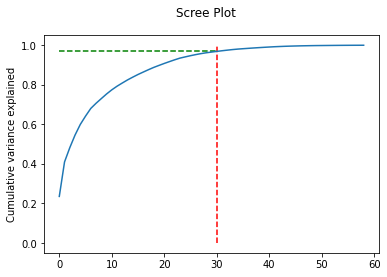

In [74]:
explained_var = np.cumsum(pca.explained_variance_ratio_)
plt.vlines(x= 30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y= 0.97, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(explained_var)
plt.ylabel("Cumulative variance explained")
plt.suptitle('Scree Plot')
plt.show()

### 30 principal components capture upto 97% variation in the data. So lets use IncrementalPCA to fit and transform on the first 30 principal components

In [75]:
from sklearn.decomposition import IncrementalPCA
pca_1 = IncrementalPCA(n_components = 30)
pca_train_df = pca_1.fit_transform(X_train[X_train.columns.difference(time_se.columns)])
pca_test_df = pca_1.transform(X_test[X_train.columns.difference(time_se.columns)])


In [76]:
pca_train_df = pd.DataFrame(pca_train_df)
pca_test_df = pd.DataFrame(pca_test_df)
pca_train_df.index = X_train.index
pca_test_df.index = X_test.index

In [77]:
pca_train_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
84447,-1.489564,1.028793,0.177960,-0.360450,-0.017629,0.030093,0.070452,0.511190,-0.076738,-0.468942,...,-0.271161,0.058919,-0.084832,0.226789,0.014869,0.042905,0.006816,-0.009509,0.127878,-0.117235
58480,0.908320,0.010485,-0.732049,-0.700993,0.133509,-0.022692,0.347870,0.206295,-0.087677,-0.366307,...,0.122553,-0.161202,0.301383,0.035454,0.478908,-0.200098,-0.134289,0.157728,0.231376,0.036517
98102,-0.522479,0.145969,-0.596931,0.991968,0.066019,0.114614,-0.161675,0.000635,-0.095699,-0.336211,...,0.056960,-0.041709,0.079982,-0.034061,0.049900,-0.112920,-0.087973,0.141895,-0.116186,0.110783
44873,-0.368952,0.371241,-0.962323,-0.250156,0.266018,-0.063803,0.542844,0.272832,0.192971,0.514143,...,-0.105625,-0.212500,-0.557508,-0.280782,-0.115868,0.378027,0.313227,0.073740,-0.023593,-0.165943
77858,0.607792,-0.098436,-0.026491,1.216824,1.022367,0.984085,0.648055,-0.420156,-0.057937,-0.421670,...,0.565543,0.609255,-0.196775,-0.043278,-0.052416,0.020396,0.531821,0.515972,0.191915,-0.115976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49770,1.775056,-0.103697,0.253640,-0.338280,1.361321,0.761185,0.033639,0.179877,-0.614433,0.114692,...,-0.126005,0.005345,-0.091600,-0.371563,-0.012703,0.403741,0.055072,0.052833,-0.107992,-0.049000
90836,0.061542,-0.267607,-0.077435,-0.616515,0.352095,0.138861,-0.340017,-0.264981,-0.143000,0.166957,...,-0.060239,0.232903,-0.122943,-0.106299,0.045419,-0.139770,0.290306,-0.099700,0.045354,-0.023586
76084,0.040487,-1.639063,0.243260,0.706417,-0.602896,-0.323594,0.138228,-0.104348,-0.881927,0.217851,...,0.066738,0.157070,-0.099745,0.311558,-0.003940,0.064347,-0.096156,0.154014,-0.069140,0.036085
67504,-1.431536,1.400142,0.893541,-0.342471,-0.077028,-0.015627,0.512379,-0.205823,-0.030512,0.361247,...,-0.407089,0.097718,-0.106792,0.039296,0.063422,0.004808,-0.043820,0.031999,0.164090,-0.159830


## Predictive model
## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV ,StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score,recall_score, accuracy_score , f1_score

### Lets add the dummy categorical variables to our feature space

In [79]:
X_train_pca = pd.concat([pca_train_df,X_train[time_se.columns]], axis = 1)
X_test_pca = pd.concat([pca_test_df,X_test[time_se.columns]], axis = 1)

### Performing RFE and hyperparameter tuning using GridSearchCv to select optimal no of features and most important features

### As class imbalance is very high we need to either use sampling techniques like under sampling/SMOTE or assign weights to each class thereby giving equal importance to both the classes. As class of weight method is better implemented within sklearn lets use this approach my mentioning 'class_weight' = 'balanced' within the model parameters

In [80]:
from sklearn.feature_selection import RFE
cv = StratifiedKFold(n_splits=10 ,shuffle = True, random_state=1)
hyper_params = [{'n_features_to_select': [50,60,62,64,65,70,len(X_train_pca.columns)]}]


In [81]:
lr = LogisticRegression( class_weight = 'balanced' , max_iter= 1000 )
lr.fit(X_train_pca,y_train )

rfe = RFE(lr)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= make_scorer(recall_score), 
                        cv = cv, 
                        verbose = 1,
                        return_train_score=True , n_jobs= -1)      
model_cv.fit(X_train_pca,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   54.6s
//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=RFE(estimator=LogisticRegression(class_weight='balanced',
                                                        max_iter=1000)),
             n_jobs=-1,
             param_grid=[{'n_features_to_select': [50, 60, 62, 64, 65, 70,
                                                   74]}],
             return_train_score=True, scoring=make_scorer(recall_score),
             verbose=1)

In [82]:
model_cv.best_params_

{'n_features_to_select': 70}

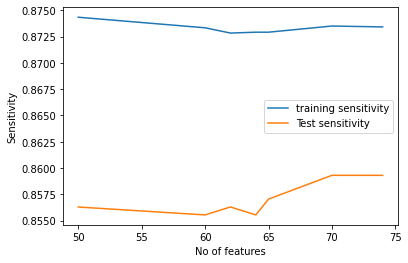

In [83]:
scores = model_cv.cv_results_
plt.figure()
plt.plot(scores["param_n_features_to_select"], 
         scores["mean_train_score"], 
         label="training sensitivity")
plt.plot(scores["param_n_features_to_select"], 
         scores["mean_test_score"], 
         label="Test sensitivity")
plt.xlabel("No of features")
plt.ylabel("Sensitivity")
plt.legend()
plt.show()

### 70 features looks optimum. Lets use 70 features and build a LR model

In [84]:
rfe1 = RFE(lr,70)
rfe1.fit(X_train_pca,y_train)
col_1 = X_train_pca.columns[rfe1.support_]
list(col_1)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=70 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 '8th_month_decrease_sachet_2g',
 '8th_month_decrease_max_rech_amt',
 '8th_month_decrease_loc_og_t2m_mou',
 '8th_month_decrease_std_og_t2t_mou',
 '8th_month_decrease_arpu',
 '8th_month_decrease_isd_og_mou',
 '8th_month_decrease_roam_og_mou',
 '8th_month_decrease_vol_3g_mb',
 '8th_month_decrease_isd_ic_mou',
 '8th_month_decrease_monthly_2g',
 '8th_month_decrease_total_ic_mou',
 '8th_month_decrease_offnet_mou',
 '8th_month_decrease_total_rech_amt',
 '8th_month_decrease_std_ic_t2f_mou',
 '8th_month_decrease_loc_ic_t2m_mou',
 '8th_month_decrease_std_og_t2m_mou',
 '8th_month_decrease_spl_ic_mou',
 '8th_month_decrease_onnet_mou',
 '8th_month_decrease_std_ic_mou',
 '8th_month_decrease_std_og_mou',
 '8th_month_decrease_av_rech_amt_data',
 '8th_month_decrease_loc_ic_mou',
 '8th_month_decrease_max_rech_data',
 '8th_month_decrease_loc_ic_t2t_mou',
 '8th_month

In [85]:
lr1 = LogisticRegression( class_weight = 'balanced',max_iter = 1000)
lr1.fit(X_train_pca[col_1],y_train )

LogisticRegression(class_weight='balanced', max_iter=1000)

### Accuracy , sensitivity on train and test set

In [86]:
y_train_pred = lr1.predict(X_train_pca[col_1])

In [87]:
from sklearn.metrics import accuracy_score,recall_score
print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

0.8649025879616168
0.872084273890143


In [88]:
y_test_pred = lr1.predict(X_test_pca[col_1])
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

0.8585136078157711
0.8465011286681715


## Ridge Classifier

In [89]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV ,StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score,recall_score, accuracy_score , f1_score


cv = StratifiedKFold(n_splits=10 )
alpha = [1,10,100,200,500,1000,2000,5000,10000]
grid = dict(alpha = alpha)
Rid_class = RidgeClassifier(class_weight = 'balanced')

grid_search = GridSearchCV(estimator = Rid_class , param_grid= grid , cv = cv , n_jobs = -1 , scoring = make_scorer(recall_score)  , return_train_score= True)
grid_fit = grid_search.fit(X_train_pca,y_train)

//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [90]:
grid_fit.best_params_

{'alpha': 1}

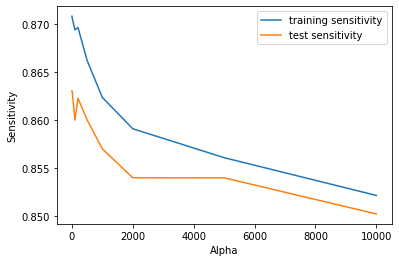

In [91]:
scores = grid_search.cv_results_
plt.figure()
plt.plot(scores["param_alpha"], 
         scores["mean_train_score"], 
         label="training sensitivity")
plt.plot(scores["param_alpha"], 
         scores["mean_test_score"], 
         label="test sensitivity")
plt.xlabel("Alpha")
plt.ylabel("Sensitivity")
plt.legend()
plt.show()

### When we choose lower values of alpha it seems to overfit. 5000 looks as a better value for alpha as the difference in sensitivity of train and cv set is minimal at this point

In [92]:
Rid_class1 = RidgeClassifier(class_weight = 'balanced' , alpha = 5000)
Rid_class1.fit(X_train_pca,y_train)

y_train_pred1 = Rid_class1.predict(X_train_pca)
print(accuracy_score(y_train,y_train_pred1))
print(recall_score(y_train,y_train_pred1))

0.8144227973248037
0.8562829194883371


### Accuracy , Sensitivity of Train and test set

In [93]:
y_test_pred1 = Rid_class1.predict(X_test_pca)
print(accuracy_score(y_test,y_test_pred1))
print(recall_score(y_test,y_test_pred1))

0.817341242149337
0.8487584650112867


## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [95]:
cv = StratifiedKFold(n_splits= 5 )
grid = {
    'max_depth': range(1,50,5),
    'min_samples_leaf': range(1, 500, 50),
    'min_samples_split': range(1, 500, 50),
    'criterion': ["entropy", "gini"]
}
dt = DecisionTreeClassifier(class_weight = 'balanced' , random_state= 100)

grid_search_dt = GridSearchCV(estimator = dt , param_grid= grid , cv = cv , n_jobs = -1 , scoring = 'roc_auc' , return_train_score= True)
grid_fit_dt = grid_search_dt.fit(X_train_pca,y_train)

//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [96]:
grid_fit_dt.best_score_


0.8753613039615239

In [97]:
grid_fit_dt.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=21,
                       min_samples_leaf=51, min_samples_split=401,
                       random_state=100)

In [98]:
dt_gini = DecisionTreeClassifier(criterion = "gini",class_weight = 'balanced' ,
                                  random_state = 100,
                                  max_depth= 16, 
                                  min_samples_leaf= 51,
                                  min_samples_split= 401)
dt_gini.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=16,
                       min_samples_leaf=51, min_samples_split=401,
                       random_state=100)

In [99]:
dt_gini.score(X_train_pca,y_train)

0.8138412329165455

In [100]:
dt_gini.score(X_test_pca,y_test)

0.805129099790649

### Sensitivity of train-test set

In [101]:
dt_train_pred = dt_gini.predict(X_train_pca)
dt_test_pred = dt_gini.predict(X_test_pca)

print(recall_score(y_train,dt_train_pred))
print(recall_score(y_test,dt_test_pred))

0.8886380737396539
0.8171557562076749


### The model seems to overfit a bit as the difference in sensitivity for train and test set is huge. But Tree Based ensemble models like Random Forest and Xgboost may reduce overfitting and may also increase the performance. Lets first build a RandomForestClassifier

### Random forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
import warnings
warnings.simplefilter(action= 'default')

## As the data is very huge and there are many features ,tuning all hyperparameters at once for ensemble models is not a great approach as it is computationally very expensive. So lets choose a different approach. <br> Step 1) Choose a hyperparameter and perform grid search Cv on top of it. Let the other parameters stay as per default.  <br> Step 2) Plot the train and cv scores across different values of hyperparameter. <br> Step 3) Avoid the trend for train and cv for the hyperparameter in the plot. Choose the best value where we can avoid overfitting <br> Step 4) Include the hyperparameter in the next step and tune the next hyperparameter. <br> Repeat these steps until we find best values of all the hyperparameters and create a new RF model out of it. 

### Tuning max_depth

In [104]:
rf = RandomForestClassifier( class_weight= 'balanced' )
cv = StratifiedKFold(n_splits= 5 , shuffle = True )
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10,12,16,20],
}

grid_search_rf = GridSearchCV(rf, param_grid, 
                    cv= cv, 
                       scoring= 'roc_auc', n_jobs= -1 , return_train_score= True)
grid_search_rf.fit(X_train_pca,y_train)

//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 20]},
             return_train_score=True, scoring='roc_auc')

In [105]:
grid_search_rf.best_params_

{'max_depth': 20}

In [106]:
grid_search_rf.best_score_

0.9176168158719513

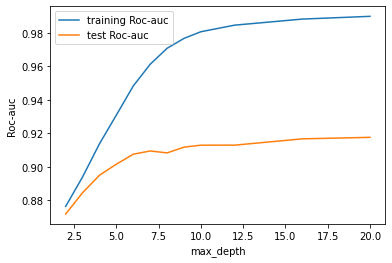

In [107]:
scores = grid_search_rf.cv_results_
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training Roc-auc")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test Roc-auc")
plt.xlabel("max_depth")
plt.ylabel("Roc-auc")
plt.legend()
plt.show()

### Tuning n_estimators

In [108]:
rf = RandomForestClassifier( class_weight= 'balanced' , max_depth = 6)
cv = StratifiedKFold(n_splits= 5 , shuffle = True , random_state= 1)
param_grid = {'n_estimators': range(100,500,50)}

grid_search_rf = GridSearchCV(rf, param_grid, 
                    cv= cv, 
                       scoring= 'roc_auc', n_jobs= -1 , return_train_score= True)
grid_search_rf.fit(X_train_pca,y_train)

//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=6),
             n_jobs=-1, param_grid={'n_estimators': range(100, 500, 50)},
             return_train_score=True, scoring='roc_auc')

In [109]:
grid_search_rf.best_params_

{'n_estimators': 400}

In [110]:
grid_search_rf.best_score_

0.9083501112241648

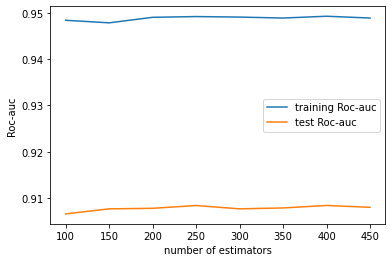

In [111]:
scores = grid_search_rf.cv_results_
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training Roc-auc")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test Roc-auc")
plt.xlabel("number of estimators")
plt.ylabel("Roc-auc")
plt.legend()
plt.show()

### Tuning max-features

In [112]:
rf = RandomForestClassifier( class_weight= 'balanced' , max_depth = 6, n_estimators = 200)
cv = StratifiedKFold(n_splits= 5 , shuffle = True , random_state= 1)
param_grid = {'max_features': [1,2,5,10,20,30,40,50]}

grid_search_rf = GridSearchCV(rf, param_grid, 
                    cv= cv, 
                       scoring= 'roc_auc', n_jobs= -1 , return_train_score= True)
grid_search_rf.fit(X_train_pca,y_train)

//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=6, n_estimators=200),
             n_jobs=-1,
             param_grid={'max_features': [1, 2, 5, 10, 20, 30, 40, 50]},
             return_train_score=True, scoring='roc_auc')

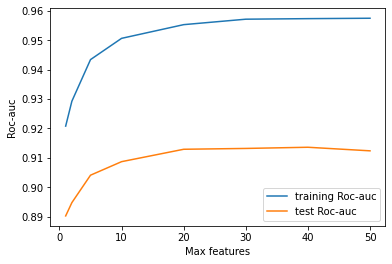

In [113]:
scores = grid_search_rf.cv_results_
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training Roc-auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test Roc-auc")
plt.xlabel("Max features")
plt.ylabel("Roc-auc")
plt.legend()
plt.show()

In [114]:
grid_search_rf.best_params_

{'max_features': 40}

### Tuning min_samples_leaf

In [115]:
rf = RandomForestClassifier( class_weight= 'balanced' , max_depth = 6 , n_estimators = 200 ,max_features= 5)
cv = StratifiedKFold(n_splits= 5 , shuffle = True , random_state= 1)
param_grid = {'min_samples_leaf': [0.001,0.005,0.01,0.1,0.2,0.5]}

grid_search_rf = GridSearchCV(rf, param_grid, 
                    cv= cv, 
                       scoring= 'roc_auc', n_jobs= -1 , return_train_score= True)
grid_search_rf.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=6, max_features=5,
                                              n_estimators=200),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [0.001, 0.005, 0.01, 0.1, 0.2,
                                              0.5]},
             return_train_score=True, scoring='roc_auc')

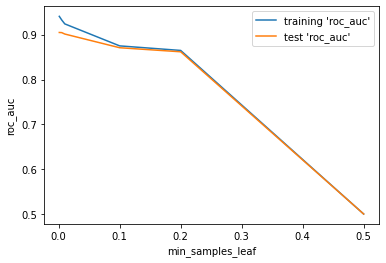

In [116]:
scores = grid_search_rf.cv_results_
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training 'roc_auc'")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test 'roc_auc'")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [117]:
grid_search_rf.best_params_

{'min_samples_leaf': 0.001}

### Tuning min_samples_split

In [118]:
rf = RandomForestClassifier( class_weight= 'balanced' , max_depth = 6 , n_estimators = 200 ,max_features= 5,
                           min_samples_leaf= 0.1)
cv = StratifiedKFold(n_splits= 5 , shuffle = True )
param_grid = {'min_samples_split': [0.001,0.005,0.01,0.05,0.1,0.15,0.2]}

grid_search_rf = GridSearchCV(rf, param_grid, 
                    cv= cv, 
                       scoring= 'roc_auc', n_jobs= -1 , return_train_score= True)
grid_search_rf.fit(X_train_pca,y_train)

//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=6, max_features=5,
                                              min_samples_leaf=0.1,
                                              n_estimators=200),
             n_jobs=-1,
             param_grid={'min_samples_split': [0.001, 0.005, 0.01, 0.05, 0.1,
                                               0.15, 0.2]},
             return_train_score=True, scoring='roc_auc')

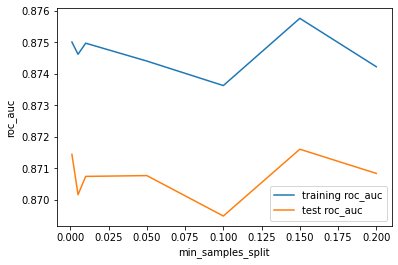

In [119]:
scores = grid_search_rf.cv_results_
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [120]:
grid_search_rf.best_params_

{'min_samples_split': 0.15}

## Final Random Forest model

In [121]:
rf1 = RandomForestClassifier( class_weight= 'balanced' , max_depth = 6 , n_estimators = 200 ,max_features= 5,
                           min_samples_leaf= 0.1, min_samples_split= 0.01 ,bootstrap= True)
rf1.fit(X_train_pca,y_train)
                             
                             
                             
                             

RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=5,
                       min_samples_leaf=0.1, min_samples_split=0.01,
                       n_estimators=200)

### Accuracy and Sensitivity of Train and Test set

In [122]:
y_train_pred1 = rf1.predict(X_train_pca)
print(accuracy_score(y_train,y_train_pred1))
print(recall_score(y_train,y_train_pred1))



0.768711834835708
0.8194130925507901


In [123]:
y_test_pred1 = rf1.predict(X_test_pca)
print(accuracy_score(y_test,y_test_pred1))
print(recall_score(y_test,y_test_pred1))

0.7744242847173761
0.8148984198645598


## Boosting  - ADA BOOST

### Lets tune the learning rate and n_estimators of Adaboost based model with the same approach we used for RF. 

In [124]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {'learning_rate': [0.001,0.005,0.01,0.05] + [float(x)/10 for x in range(1,11)]
             }
tree = DecisionTreeClassifier( max_depth = 6 ,max_features= 5,
                           min_samples_leaf= 0.1, min_samples_split= 0.01 )

ABC = AdaBoostClassifier(
    base_estimator=tree  )

cv = StratifiedKFold(n_splits= 5 , shuffle = True )

grid_search_ada = GridSearchCV(ABC, param_grid = param_grid, 
                    cv= cv, scoring= 'roc_auc', n_jobs= -1 , return_train_score= True)
grid_search_ada.fit(X_train_pca,y_train)

//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                                                max_features=5,
                                                                                min_samples_leaf=0.1,
                                                                                min_samples_split=0.01)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                                           0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                           1.0]},
             return_train_score=True, scoring='roc_auc')

In [125]:
grid_search_ada.best_params_

{'learning_rate': 0.4}

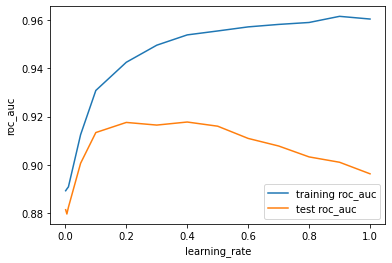

In [126]:
scores = grid_search_ada.cv_results_
plt.figure()
plt.plot(scores["param_learning_rate"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_learning_rate"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("learning_rate")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [127]:
param_grid = {'n_estimators': [30,50,100,150,200,250,300,350,500]
             }
tree = DecisionTreeClassifier( max_depth = 6 ,max_features= 5,
                           min_samples_leaf= 0.1, min_samples_split= 0.01 )

ABC = AdaBoostClassifier(
    base_estimator=tree , learning_rate= 0.01 )

cv = StratifiedKFold(n_splits= 5 , shuffle = True )

grid_search_ada = GridSearchCV(ABC, param_grid = param_grid, 
                    cv= cv, scoring= 'roc_auc', n_jobs= -1 , return_train_score= True)
grid_search_ada.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                                                max_features=5,
                                                                                min_samples_leaf=0.1,
                                                                                min_samples_split=0.01),
                                          learning_rate=0.01),
             n_jobs=-1,
             param_grid={'n_estimators': [30, 50, 100, 150, 200, 250, 300, 350,
                                          500]},
             return_train_score=True, scoring='roc_auc')

In [128]:
grid_search_ada.best_params_

{'n_estimators': 500}

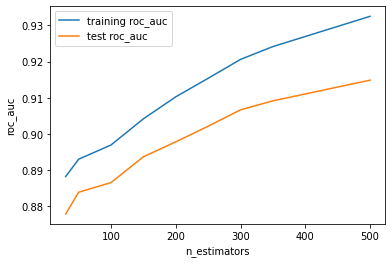

In [129]:
scores = grid_search_ada.cv_results_
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [130]:
tree1 = DecisionTreeClassifier(class_weight = 'balanced',max_depth = 6, min_samples_leaf= 0.1, min_samples_split= 0.01,max_features = 5)
ABC_class =  AdaBoostClassifier(
    base_estimator=tree1, learning_rate= 0.01 , n_estimators= 300)
ABC_class.fit(X_train_pca,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=6,
                                                         max_features=5,
                                                         min_samples_leaf=0.1,
                                                         min_samples_split=0.01),
                   learning_rate=0.01, n_estimators=300)

### Accuracy and sensitivity of Adaboost model

In [131]:
ABC_train_pred = ABC_class.predict(X_train_pca)
print(accuracy_score(y_train,ABC_train_pred))
print(recall_score(y_train,ABC_train_pred))

0.848502471648735
0.8337095560571859


In [132]:
ABC_test_pred = ABC_class.predict(X_test_pca)
print(accuracy_score(y_test,ABC_test_pred))
print(recall_score(y_test,ABC_test_pred))

0.8452547103977669
0.8103837471783296


### Xgboost

In [133]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [134]:
y_train.value_counts(normalize = True) * 100

0.0    92.271009
1.0     7.728991
Name: churn, dtype: float64

In [135]:

xgb_model = XGBClassifier(n_estimators= 300,max_depth = 6,scale_pos_weight= 92.271 ,
                          min_samples_leaf= 0.1, min_samples_split= 0.01,max_features = 5)

cv = StratifiedKFold(n_splits= 5 , shuffle = True )
param_grid = {'learning_rate': [0.0001,0.001,0.01,0.1,0.2,0.3,0.6,0.9,1]}
grid_search_xgb = GridSearchCV(xgb_model, param_grid = param_grid, 
                    cv= cv, scoring= 'roc_auc', n_jobs= -1 , return_train_score= True)
grid_search_xgb.fit(X_train_pca,y_train)

//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(max_depth=6, max_features=5,
                                     min_samples_leaf=0.1,
                                     min_samples_split=0.01, n_estimators=300,
                                     scale_pos_weight=92.271),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                           0.6, 0.9, 1]},
             return_train_score=True, scoring='roc_auc')

In [136]:
grid_search_xgb.best_params_

{'learning_rate': 0.3}

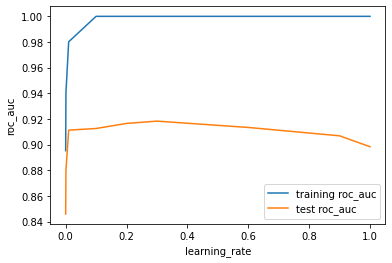

In [137]:
scores = grid_search_xgb.cv_results_
plt.figure()
plt.plot(scores["param_learning_rate"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_learning_rate"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("learning_rate")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [138]:
xgb_model = XGBClassifier(n_estimators= 300,max_depth = 6,scale_pos_weight= 92.271 ,
                          min_samples_leaf= 0.1, min_samples_split= 0.01,max_features = 5,learning_rate= 0.01)

cv = StratifiedKFold(n_splits= 5 , shuffle = True )
param_grid = {'subsample': [0.1,0.2,0.3,0.4,0.5,0.7,0.9,1]}
grid_search_xgb = GridSearchCV(xgb_model, param_grid = param_grid, 
                    cv= cv, scoring= 'roc_auc', n_jobs= -1 , return_train_score= True)
grid_search_xgb.fit(X_train_pca,y_train)

//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(learning_rate=0.01, max_depth=6,
                                     max_features=5, min_samples_leaf=0.1,
                                     min_samples_split=0.01, n_estimators=300,
                                     scale_pos_weight=92.271),
             n_jobs=-1,
             param_grid={'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1]},
             return_train_score=True, scoring='roc_auc')

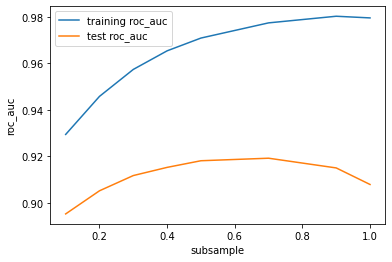

In [139]:
scores = grid_search_xgb.cv_results_
plt.figure()
plt.plot(scores["param_subsample"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_subsample"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("subsample")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [140]:
xgb_model = XGBClassifier(n_estimators= 300,max_depth = 6 , learning_rate= 0.001, subsample= 0.1
                          ,scale_pos_weight= 92.271 , max_features = 5,min_samples_leaf= 0.1, min_samples_split= 0.01)
xgb_model.fit(X_train_pca,y_train)

XGBClassifier(learning_rate=0.001, max_depth=6, max_features=5,
              min_samples_leaf=0.1, min_samples_split=0.01, n_estimators=300,
              scale_pos_weight=92.271, subsample=0.1)

## Accuracy and Sensitivity 

In [141]:
xgb_pred_train = xgb_model.predict(X_train_pca)
print(accuracy_score(y_train,xgb_pred_train))
print(recall_score(y_train,xgb_pred_train))

0.7685955219540564
0.8607975921745673


In [142]:
xgb_pred_test = xgb_model.predict(X_test_pca)
print(accuracy_score(y_test,xgb_pred_test))
print(recall_score(y_test,xgb_pred_test))

0.7690160502442428
0.8397291196388262


In [143]:
algorithm = [lr1, Rid_class1 , dt_gini , rf1, ABC_class , xgb_model]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

## Train metrics of Different Models

In [145]:
algo_data = pd.DataFrame(columns = ['Accuracy','Sensitivity','F1-score','ROC-auc'])

for alg in algorithm:
    if str(alg).split('(')[0] == 'LogisticRegression':
        train_predict = alg.predict(X_train_pca[col_1])
    else:
        train_predict = alg.predict(X_train_pca)
    accuracy = accuracy_score(y_train,train_predict)
    sensitivity = recall_score(y_train,train_predict)
    f1_scorer = f1_score(y_train,train_predict)
    roc_AUC = roc_auc_score(y_train,train_predict)
    model_name = str(alg).split('(')[0]
    algo_data.loc[model_name] = [accuracy,sensitivity,f1_scorer,roc_AUC]
    
algo_data

,Accuracy,Sensitivity,F1-score,ROC-auc
LogisticRegression,0.864903,0.872084,0.499461,0.868193
RidgeClassifier,0.814423,0.856283,0.416316,0.833600
DecisionTreeClassifier,0.813841,0.888638,0.424591,0.848107
RandomForestClassifier,0.768712,0.819413,0.353859,0.791939
AdaBoostClassifier,0.848502,0.833710,0.459656,0.841726
XGBClassifier,0.768596,0.860798,0.365087,0.810835


## Lets see how the models perform on unseen data(test data)

In [146]:
algo_test = pd.DataFrame(columns = ['Accuracy','Sensitivity','F1-score','ROC-auc'])

for alg in algorithm:
    if str(alg).split('(')[0] == 'LogisticRegression':
        test_predict = alg.predict(X_test_pca[col_1])
    else:
        test_predict = alg.predict(X_test_pca)
    accuracy = accuracy_score(y_test,test_predict)
    sensitivity = recall_score(y_test,test_predict)
    f1_scorer = f1_score(y_test,test_predict)
    roc_AUC = roc_auc_score(y_test,test_predict)
    model_name = str(alg).split('(')[0]
    algo_test.loc[model_name] = [accuracy,sensitivity,f1_scorer,roc_AUC]
    
algo_test

,Accuracy,Sensitivity,F1-score,ROC-auc
LogisticRegression,0.858514,0.846501,0.480461,0.853010
RidgeClassifier,0.817341,0.848758,0.418010,0.831734
DecisionTreeClassifier,0.805129,0.817156,0.393265,0.810639
RandomForestClassifier,0.774424,0.814898,0.358313,0.792966
AdaBoostClassifier,0.845255,0.810384,0.447352,0.829280
XGBClassifier,0.769016,0.839729,0.359768,0.801411


## Interpretable model ( Identifying churn indicators)

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
train_new, test_new = train_test_split(two_mix, test_size = 0.25 , random_state = 50, stratify = two_mix['churn']) 

y_train_new = train_new.pop('churn')
y_test_new = test_new.pop('churn')
X_train_new = train_new
X_test_new = test_new

scaler = MinMaxScaler()
X_train_new[X_train_new.columns] = scaler.fit_transform(X_train_new)
X_test_new[X_test_new.columns] = scaler.transform(X_test_new)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### As we are building a interpretable model and Logistic Regression is a better model for interpretability we choose to build Log Model using statsmodels library. Statsmodels can produce better summary reports unlike sklearn. Here, lets a build log regression model using the actual features itself without performing Dimensionality Reduction. `Also lets do SMOTE on the train data to handle class imbalance`

In [148]:
import sklearn
from imblearn.over_sampling import SMOTE 
smo = SMOTE(random_state = 2) 
X_train_res, y_train_res = smo.fit_sample(X_train_new, y_train_new) 

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Lets do RFE to pick top 15 features 

In [149]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression( class_weight = 'balanced' , max_iter = 1000  )
lr.fit(X_train_res,y_train_res )

rfe = RFE(lr,15)
rfe.fit(X_train_res,y_train_res )
rfe_col_1 = X_train_res.columns[rfe.support_]
rfe_col_1

//anaconda3/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['arpu_7', 'av_rech_amt_data_8', 'last_day_rch_amt_8', 'max_rech_amt_8',
       'offnet_mou_6', 'onnet_mou_6', 'std_og_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_og_mou_6', 'total_og_mou_8',
       'total_rech_amt_8', 'total_rech_num_8', 'days_last_rech_month_8',
       '8th_month_decrease_roam_og_mou'],
      dtype='object')

In [150]:
rfe_col = rfe_col_1[:]
y_train_log = y_train_res

### As interpretability is important here we need to handle multi collinearity , check the significance of the co-efficients and also look at the combination of features we arrive in our final model from business perspective.

### MODEL 1

In [151]:
X_train_log = X_train_res[rfe_col]

log_model_1 = sm.GLM(y_train_log,sm.add_constant(X_train_log) , family= sm.families.Binomial()).fit()

log_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31732
Model:                            GLM   Df Residuals:                    31716
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10272.
Date:                Sun, 05 Jul 2020   Deviance:                       20545.
Time:                        16:06:09   Pearson chi2:                 4.96e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.1475      0.073     29.376      0.000       2.004       2.291
arpu_7                             1.6016      0.119     13.467      0.000       1.368       1.835
av_rech_amt_data_8                -3.3361      0.138    -24.099      0.000      -3.607      -3.065
last_day_rch_amt_8                -3.3864      0.103    -32.985      0.000      -3.588      -3.185
max_rech_amt_8                    -2.7248      0.175    -15.586      0.000      -3.067      -2.382
offnet_mou_6                       2.6756      0.208     12.892      0.000       2.269       3.082
onnet_mou_6                        2.7489      0.194     14.194      0.000       2.369       3.129
std_og_mou_8                       3.0461      0.268     11.379      0.000       2.521       3.571
total_ic_mou_7                     1.6595      0.149     11.174      0.000       1.368       1.951
total_ic_mou_8                    -5.1991      0.216    -24.123      0.000      -5.622      -4.777
total_og_mou_6                    -3.3786      0.279    -12.102      0.000      -3.926      -2.831
total_og_mou_8                    -5.5148      0.349    -15.785      0.000      -6.200      -4.830
total_rech_amt_8                   2.1911      0.245      8.925      0.000       1.710       2.672
total_rech_num_8                  -2.5194      0.130    -19.348      0.000      -2.775      -2.264
days_last_rech_month_8             2.6598      0.082     32.515      0.000       2.499       2.820
8th_month_decrease_roam_og_mou    -1.6138      0.049    -32.808      0.000      -1.710      -1.517
==================================================================================================
"""

## VIF (variance inflation factor )  - Assigning cutoff as 3

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_og_mou_6,36.70
4,offnet_mou_6,16.83
11,total_rech_amt_8,16.25
10,total_og_mou_8,13.86
5,onnet_mou_6,13.58
6,std_og_mou_8,6.70
3,max_rech_amt_8,6.12
8,total_ic_mou_8,5.86
7,total_ic_mou_7,5.35
12,total_rech_num_8,4.64


### Lets remove 'total_og_mou_6' as it has high VIF and check the model again <br> MODEL 2

In [153]:
rfe_col = rfe_col.difference(['total_og_mou_6'])
X_train_log = X_train_log[rfe_col]

log_model_2 = sm.GLM(y_train_log,sm.add_constant(X_train_log) , family= sm.families.Binomial()).fit()

log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31732
Model:                            GLM   Df Residuals:                    31717
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10350.
Date:                Sun, 05 Jul 2020   Deviance:                       20699.
Time:                        16:06:09   Pearson chi2:                 5.14e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.1828      0.073     30.083      0.000       2.041       2.325
8th_month_decrease_roam_og_mou    -1.5347      0.048    -31.719      0.000      -1.630      -1.440
arpu_7                             1.5946      0.119     13.455      0.000       1.362       1.827
av_rech_amt_data_8                -3.5350      0.137    -25.713      0.000      -3.804      -3.266
days_last_rech_month_8             2.6451      0.081     32.471      0.000       2.485       2.805
last_day_rch_amt_8                -3.3968      0.102    -33.210      0.000      -3.597      -3.196
max_rech_amt_8                    -2.7511      0.174    -15.833      0.000      -3.092      -2.411
offnet_mou_6                       0.3558      0.076      4.704      0.000       0.208       0.504
onnet_mou_6                        0.5933      0.073      8.139      0.000       0.450       0.736
std_og_mou_8                       3.2873      0.267     12.293      0.000       2.763       3.811
total_ic_mou_7                     1.5591      0.147     10.590      0.000       1.271       1.848
total_ic_mou_8                    -5.1828      0.215    -24.161      0.000      -5.603      -4.762
total_og_mou_8                    -6.1019      0.346    -17.614      0.000      -6.781      -5.423
total_rech_amt_8                   2.7512      0.239     11.534      0.000       2.284       3.219
total_rech_num_8                  -2.6341      0.129    -20.371      0.000      -2.888      -2.381
==================================================================================================
"""

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_rech_amt_8,15.94
11,total_og_mou_8,13.66
8,std_og_mou_8,6.68
5,max_rech_amt_8,6.12
10,total_ic_mou_8,5.86
9,total_ic_mou_7,5.34
13,total_rech_num_8,4.63
1,arpu_7,4.43
0,8th_month_decrease_roam_og_mou,3.56
4,last_day_rch_amt_8,2.86


### Lets remove 'total_rech_amt_8'

In [155]:
rfe_col = rfe_col.difference(['total_rech_amt_8'])
X_train_log = X_train_log[rfe_col]

log_model_3 = sm.GLM(y_train_log,sm.add_constant(X_train_log) , family= sm.families.Binomial()).fit()

log_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31732
Model:                            GLM   Df Residuals:                    31718
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10416.
Date:                Sun, 05 Jul 2020   Deviance:                       20832.
Time:                        16:06:09   Pearson chi2:                 5.17e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.2421      0.073     30.864      0.000       2.100       2.384
8th_month_decrease_roam_og_mou    -1.6337      0.048    -33.832      0.000      -1.728      -1.539
arpu_7                             1.9474      0.116     16.843      0.000       1.721       2.174
av_rech_amt_data_8                -3.4514      0.138    -24.975      0.000      -3.722      -3.181
days_last_rech_month_8             2.4494      0.079     31.165      0.000       2.295       2.603
last_day_rch_amt_8                -2.9806      0.094    -31.619      0.000      -3.165      -2.796
max_rech_amt_8                    -1.7316      0.150    -11.545      0.000      -2.026      -1.438
offnet_mou_6                       0.3339      0.075      4.425      0.000       0.186       0.482
onnet_mou_6                        0.5410      0.072      7.475      0.000       0.399       0.683
std_og_mou_8                       2.8910      0.262     11.015      0.000       2.377       3.405
total_ic_mou_7                     1.3575      0.145      9.355      0.000       1.073       1.642
total_ic_mou_8                    -4.9742      0.213    -23.406      0.000      -5.391      -4.558
total_og_mou_8                    -4.8924      0.326    -15.024      0.000      -5.531      -4.254
total_rech_num_8                  -1.8503      0.109    -16.976      0.000      -2.064      -1.637
==================================================================================================
"""

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_og_mou_8,11.26
8,std_og_mou_8,6.55
10,total_ic_mou_8,5.80
9,total_ic_mou_7,5.29
5,max_rech_amt_8,4.74
1,arpu_7,4.08
0,8th_month_decrease_roam_og_mou,3.49
12,total_rech_num_8,3.25
4,last_day_rch_amt_8,2.56
3,days_last_rech_month_8,2.55


### Lets remove total_og_mou_8	

In [157]:
rfe_col = rfe_col.difference(['total_og_mou_8'])
X_train_log = X_train_log[rfe_col]

log_model_4 = sm.GLM(y_train_log,sm.add_constant(X_train_log) , family= sm.families.Binomial()).fit()

log_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31732
Model:                            GLM   Df Residuals:                    31719
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10550.
Date:                Sun, 05 Jul 2020   Deviance:                       21101.
Time:                        16:06:10   Pearson chi2:                 5.85e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.4366      0.072     33.962      0.000       2.296       2.577
8th_month_decrease_roam_og_mou    -1.7593      0.048    -36.954      0.000      -1.853      -1.666
arpu_7                             1.7052      0.113     15.076      0.000       1.483       1.927
av_rech_amt_data_8                -3.1709      0.136    -23.342      0.000      -3.437      -2.905
days_last_rech_month_8             2.5140      0.078     32.076      0.000       2.360       2.668
last_day_rch_amt_8                -3.1056      0.094    -33.212      0.000      -3.289      -2.922
max_rech_amt_8                    -2.2196      0.147    -15.122      0.000      -2.507      -1.932
offnet_mou_6                       0.2285      0.074      3.085      0.002       0.083       0.374
onnet_mou_6                        0.4431      0.070      6.292      0.000       0.305       0.581
std_og_mou_8                      -0.6576      0.098     -6.687      0.000      -0.850      -0.465
total_ic_mou_7                     1.5153      0.145     10.440      0.000       1.231       1.800
total_ic_mou_8                    -6.4598      0.201    -32.164      0.000      -6.853      -6.066
total_rech_num_8                  -2.1466      0.107    -20.040      0.000      -2.357      -1.937
==================================================================================================
"""

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_ic_mou_7,5.25
10,total_ic_mou_8,4.90
5,max_rech_amt_8,4.62
1,arpu_7,4.01
0,8th_month_decrease_roam_og_mou,3.48
11,total_rech_num_8,3.17
4,last_day_rch_amt_8,2.53
3,days_last_rech_month_8,2.47
6,offnet_mou_6,2.17
8,std_og_mou_8,2.15


### Lets remove 'total_ic_mou_7'

In [159]:
rfe_col = rfe_col.difference(['total_ic_mou_7'])
X_train_log = X_train_log[rfe_col]

log_model_5 = sm.GLM(y_train_log,sm.add_constant(X_train_log) , family= sm.families.Binomial()).fit()

log_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31732
Model:                            GLM   Df Residuals:                    31720
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10608.
Date:                Sun, 05 Jul 2020   Deviance:                       21217.
Time:                        16:06:10   Pearson chi2:                 5.82e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.5601      0.071     36.185      0.000       2.421       2.699
8th_month_decrease_roam_og_mou    -1.8096      0.047    -38.181      0.000      -1.902      -1.717
arpu_7                             2.0580      0.109     18.959      0.000       1.845       2.271
av_rech_amt_data_8                -3.1844      0.136    -23.412      0.000      -3.451      -2.918
days_last_rech_month_8             2.5677      0.078     32.984      0.000       2.415       2.720
last_day_rch_amt_8                -3.1544      0.093    -33.824      0.000      -3.337      -2.972
max_rech_amt_8                    -2.4082      0.146    -16.489      0.000      -2.694      -2.122
offnet_mou_6                       0.2793      0.074      3.771      0.000       0.134       0.424
onnet_mou_6                        0.4541      0.071      6.425      0.000       0.316       0.593
std_og_mou_8                      -0.8352      0.097     -8.614      0.000      -1.025      -0.645
total_ic_mou_8                    -5.0337      0.141    -35.760      0.000      -5.310      -4.758
total_rech_num_8                  -2.2739      0.106    -21.410      0.000      -2.482      -2.066
==================================================================================================
"""

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,max_rech_amt_8,4.61
1,arpu_7,3.62
0,8th_month_decrease_roam_og_mou,3.47
10,total_rech_num_8,3.17
4,last_day_rch_amt_8,2.52
3,days_last_rech_month_8,2.41
9,total_ic_mou_8,2.22
6,offnet_mou_6,2.14
8,std_og_mou_8,2.09
2,av_rech_amt_data_8,2.01


### Lets remove max_rech_amt_8

In [161]:
rfe_col = rfe_col.difference(['max_rech_amt_8'])
X_train_log = X_train_log[rfe_col]

log_model_6 = sm.GLM(y_train_log,sm.add_constant(X_train_log) , family= sm.families.Binomial()).fit()

log_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31732
Model:                            GLM   Df Residuals:                    31721
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10748.
Date:                Sun, 05 Jul 2020   Deviance:                       21495.
Time:                        16:06:10   Pearson chi2:                 9.09e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.2199      0.067     32.982      0.000       2.088       2.352
8th_month_decrease_roam_og_mou    -1.6590      0.047    -35.612      0.000      -1.750      -1.568
arpu_7                             1.7150      0.105     16.268      0.000       1.508       1.922
av_rech_amt_data_8                -4.2116      0.126    -33.378      0.000      -4.459      -3.964
days_last_rech_month_8             2.6168      0.077     33.826      0.000       2.465       2.768
last_day_rch_amt_8                -3.7206      0.087    -42.995      0.000      -3.890      -3.551
offnet_mou_6                       0.3708      0.073      5.069      0.000       0.227       0.514
onnet_mou_6                        0.5112      0.070      7.312      0.000       0.374       0.648
std_og_mou_8                      -1.2587      0.094    -13.325      0.000      -1.444      -1.074
total_ic_mou_8                    -5.7455      0.139    -41.447      0.000      -6.017      -5.474
total_rech_num_8                  -1.9764      0.105    -18.780      0.000      -2.183      -1.770
==================================================================================================
"""

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,8th_month_decrease_roam_og_mou,3.47
1,arpu_7,3.42
9,total_rech_num_8,3.16
3,days_last_rech_month_8,2.39
5,offnet_mou_6,2.14
8,total_ic_mou_8,2.06
4,last_day_rch_amt_8,2.04
7,std_og_mou_8,2.00
6,onnet_mou_6,1.75
2,av_rech_amt_data_8,1.65


### Lets remove '8th_month_decrease_roam_og_mou	'

In [163]:
rfe_col = rfe_col.difference(['8th_month_decrease_roam_og_mou'])
X_train_log = X_train_log[rfe_col]

log_model_7 = sm.GLM(y_train_log,sm.add_constant(X_train_log) , family= sm.families.Binomial()).fit()

log_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31732
Model:                            GLM   Df Residuals:                    31722
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11461.
Date:                Sun, 05 Jul 2020   Deviance:                       22922.
Time:                        16:06:10   Pearson chi2:                 1.80e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7163      0.050     14.336      0.000       0.618       0.814
arpu_7                     2.1208      0.103     20.537      0.000       1.918       2.323
av_rech_amt_data_8        -4.0404      0.121    -33.414      0.000      -4.277      -3.803
days_last_rech_month_8     2.4923      0.075     33.195      0.000       2.345       2.639
last_day_rch_amt_8        -3.3622      0.081    -41.294      0.000      -3.522      -3.203
offnet_mou_6               0.4395      0.071      6.164      0.000       0.300       0.579
onnet_mou_6                0.8153      0.068     12.004      0.000       0.682       0.948
std_og_mou_8              -1.4037      0.089    -15.810      0.000      -1.578      -1.230
total_ic_mou_8            -6.3349      0.138    -45.940      0.000      -6.605      -6.065
total_rech_num_8          -1.6263      0.097    -16.761      0.000      -1.816      -1.436
==========================================================================================
"""

In [164]:
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_7,3.41
8,total_rech_num_8,3.02
3,last_day_rch_amt_8,2.03
4,offnet_mou_6,2.03
7,total_ic_mou_8,2.01
6,std_og_mou_8,2.00
2,days_last_rech_month_8,1.94
5,onnet_mou_6,1.72
1,av_rech_amt_data_8,1.59


### Lets remove arpu_7

In [165]:
rfe_col = rfe_col.difference(['arpu_7'])
X_train_log = X_train_log[rfe_col]

log_model_8 = sm.GLM(y_train_log,sm.add_constant(X_train_log) , family= sm.families.Binomial()).fit()

log_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31732
Model:                            GLM   Df Residuals:                    31723
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11683.
Date:                Sun, 05 Jul 2020   Deviance:                       23365.
Time:                        16:06:11   Pearson chi2:                 2.61e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.0133      0.048     21.231      0.000       0.920       1.107
av_rech_amt_data_8        -4.2457      0.121    -35.116      0.000      -4.483      -4.009
days_last_rech_month_8     2.5272      0.074     33.980      0.000       2.381       2.673
last_day_rch_amt_8        -3.1694      0.080    -39.775      0.000      -3.326      -3.013
offnet_mou_6               0.6471      0.071      9.163      0.000       0.509       0.786
onnet_mou_6                0.8987      0.068     13.307      0.000       0.766       1.031
std_og_mou_8              -1.1764      0.087    -13.453      0.000      -1.348      -1.005
total_ic_mou_8            -6.0017      0.135    -44.555      0.000      -6.266      -5.738
total_rech_num_8          -1.1894      0.092    -12.864      0.000      -1.371      -1.008
==========================================================================================
"""

In [166]:
vif = pd.DataFrame()
vif['Features'] = X_train_log[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[rfe_col].values, i) for i in range(X_train_log[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_rech_num_8,2.73
2,last_day_rch_amt_8,1.99
5,std_og_mou_8,1.98
6,total_ic_mou_8,1.96
3,offnet_mou_6,1.86
1,days_last_rech_month_8,1.82
4,onnet_mou_6,1.67
0,av_rech_amt_data_8,1.59


### Now VIF's are less than 3 and all co-efficients are significant.Lets consider this as our final model

In [167]:
y_train_pred = log_model_8.predict(sm.add_constant(X_train_log)).values
y_train_pred

array([0.96109275, 0.04983333, 0.16803371, ..., 0.89707477, 0.8639586 ,
       0.87614219])

### Lets save our probabilistic output in a dataframe

In [168]:
y_train_pred_final = pd.DataFrame({'Actual_churn_label':y_train_log.values, 'Churn_Prob_pred':y_train_pred})
y_train_pred_final.head()

,Actual_churn_label,Churn_Prob_pred
0,0.0,0.961093
1,0.0,0.049833
2,0.0,0.168034
3,0.0,0.076694
4,0.0,0.158412


### Lets generate our predicted labels at different values of cut-off

In [169]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Churn_Prob_pred'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_churn_label,Churn_Prob_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.961093,1,1,1,1,1,1,1,1,1,1
1,0.0,0.049833,1,0,0,0,0,0,0,0,0,0
2,0.0,0.168034,1,1,0,0,0,0,0,0,0,0
3,0.0,0.076694,1,0,0,0,0,0,0,0,0,0
4,0.0,0.158412,1,1,0,0,0,0,0,0,0,0


### Lets make a dataframe of how accuracy,sensitivity and specificity looks like at different cut-off range

In [170]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Actual_churn_label'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.715461,0.972898,0.458023
0.2,0.2,0.781482,0.948569,0.614396
0.3,0.3,0.820654,0.925942,0.715366
0.4,0.4,0.844258,0.898273,0.790243
0.5,0.5,0.854343,0.863671,0.845014
0.6,0.6,0.855320,0.825224,0.885415
0.7,0.7,0.845771,0.773163,0.918379
0.8,0.8,0.815297,0.684987,0.945607
0.9,0.9,0.672570,0.366633,0.978508


### Lets plot the sensitivity-specificity curve

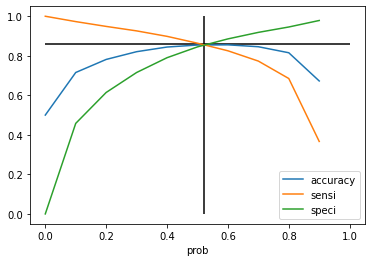

In [171]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.hlines(xmin = 0,xmax = 1, y = 0.86)
plt.vlines(ymin = 0,ymax = 1, x = 0.52)
plt.show()

## According to the curve lets choose 0.52 as our cutoff

In [172]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Churn_Prob_pred'].map( lambda x: 1 if x >= 0.52 else 0)

y_train_pred_final.head()

,Actual_churn_label,Churn_Prob_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.961093,1,1,1,1,1,1,1,1,1,1,1
1,0.0,0.049833,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.168034,1,1,0,0,0,0,0,0,0,0,0
3,0.0,0.076694,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.158412,1,1,0,0,0,0,0,0,0,0,0


### Metrics of the train dataset

In [173]:
metrics.accuracy_score(y_train_pred_final['Actual_churn_label'], y_train_pred_final['final_predicted'])

0.8557607462498424

In [174]:
metrics.recall_score(y_train_pred_final['Actual_churn_label'], y_train_pred_final['final_predicted'])

0.8563595109038195

In [175]:
y_test_pred = log_model_8.predict(sm.add_constant(X_test_new[X_train_log.columns])).values
y_test_pred

array([0.00844246, 0.06016581, 0.01576314, ..., 0.31196621, 0.00060749,
       0.20496014])

In [176]:
y_test_pred_final = pd.DataFrame({'Actual_churn_label':y_test_new.values, 'Churn_Prob_pred':y_test_pred})
y_test_pred_final.head()

,Actual_churn_label,Churn_Prob_pred
0,0.0,0.008442
1,0.0,0.060166
2,0.0,0.015763
3,0.0,0.003798
4,0.0,0.042821


In [177]:
y_test_pred_final['final_predicted'] = y_test_pred_final['Churn_Prob_pred'].map( lambda x: 1 if x >= 0.52 else 0)

y_test_pred_final.head()

,Actual_churn_label,Churn_Prob_pred,final_predicted
0,0.0,0.008442,0
1,0.0,0.060166,0
2,0.0,0.015763,0
3,0.0,0.003798,0
4,0.0,0.042821,0


### Metrics of the test dataset

In [178]:
metrics.accuracy_score(y_test_pred_final['Actual_churn_label'], y_test_pred_final['final_predicted'])

0.8571179344033496

In [179]:
metrics.recall_score(y_test_pred_final['Actual_churn_label'], y_test_pred_final['final_predicted'])

0.801354401805869

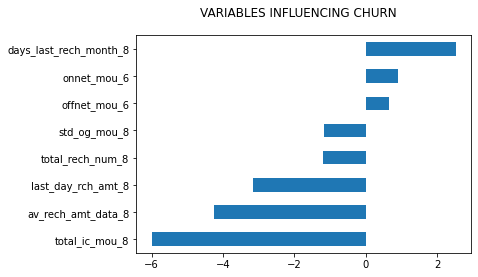

In [180]:
log_model_8.params[1:].sort_values().plot(kind = 'barh')
plt.suptitle('VARIABLES INFLUENCING CHURN')
plt.show()

In [181]:
log_model_8.params[1:].to_frame()

,0
av_rech_amt_data_8,-4.245741
days_last_rech_month_8,2.527207
last_day_rch_amt_8,-3.169383
offnet_mou_6,0.647124
onnet_mou_6,0.898651
std_og_mou_8,-1.176392
total_ic_mou_8,-6.001679
total_rech_num_8,-1.189394


## From the interpretable model we have built, it is clearly evident that most of the customers show different behaviour(churn behaviour) in the action months compared to good months. During this period the customer may have become unhappy of the service quality or there might be better offers from other network providers in the market.

## Recommendations :
## a) Constantly provide offers and value added services to the customer
## b) Adjust pricing dynamics by looking at the variation in pricing of competitors
## c) Pricing is directly proportional to the amount of calls the customer makes. So, try to reduce STD rates as it may increase the STD minutes of usage
## d) 'days_last_rech_month_8' indicates no of days ago relative to the last day of the month the customer has made his last recharge. So, people who generally recharge early on in the month generally churn in the next month. So, the company can focus on such customers by providing good services and offers to avoid churn
## e) Monitor high value customers who recharge data packs comparitively lesser than the previous months

## Metrics of various predictive models on train data

In [187]:
round(algo_data,2) * 100

,Accuracy,Sensitivity,F1-score,ROC-auc
LogisticRegression,86.0,87.0,50.0,87.0
RidgeClassifier,81.0,86.0,42.0,83.0
DecisionTreeClassifier,81.0,89.0,42.0,85.0
RandomForestClassifier,77.0,82.0,35.0,79.0
AdaBoostClassifier,85.0,83.0,46.0,84.0
XGBClassifier,77.0,86.0,37.0,81.0


## Metrics of various predictive models on test data

In [188]:
round(algo_test,2) * 100

,Accuracy,Sensitivity,F1-score,ROC-auc
LogisticRegression,86.0,85.0,48.0,85.0
RidgeClassifier,82.0,85.0,42.0,83.0
DecisionTreeClassifier,81.0,82.0,39.0,81.0
RandomForestClassifier,77.0,81.0,36.0,79.0
AdaBoostClassifier,85.0,81.0,45.0,83.0
XGBClassifier,77.0,84.0,36.0,80.0


## Based on the comparision of scores of various models on the train-data and unseen data we see that  ,logistic regression generalizes well. The metrics across the train and test-set is almost similar and also the goal of the case study is to predict churners . So,sensitivity is a important and major factor. Taking these factors into consideration lets report LogisticRegression model